<a href="https://colab.research.google.com/github/EnzoValle-data-science/Deteccion-rostros/blob/main/Liveness_facial_and_face_antispoofing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Liveness facial and face antispoofing

Integrantes: Mauricios Bustos,
             Alessandro Robles,
             Enzo Valle
             

Asignatura: Inteligencia Artificial

Profesor: Dr. Profesor Oscar Magna

##Objetivos

### Objetivo General
Desarrollar un sistema de detección de rostros con capacidades de reconocimiento de "liveness", utilizando tanto modelos propios como preentrenados, para mejorar la precisión y confiabilidad en la identificación facial.

### Objetivos especificos

- Crear un dataset personalizado con imágenes de rostros para entrenar y validar el modelo.
- Implementar un modelo de detección de rostros que identifique y localice rostros en imágenes y videos, incluyendo bounding-box, etiqueta y porcentaje de predicción.
- Incorporar un proceso de verificación de "liveness" para prevenir el spoofing facial.
- Comparar y contrastar el desempeño de modelos propios con modelos preentrenados, fundamentando técnicamente la selección de estos últimos.
- Implementar medidas anti-spoofing como la solicitud de acciones aleatorias a los usuarios (sonreír, girar la cara, parpadear, etc.).

## Alcances

El proyecto se enfocará en la creación y evaluación de un modelo de detección de rostros y "liveness", el cual será probado para realizar un analisis de mejora y recomendaciones.

## Dataset

El dataset estará compuesto por una colección diversa de imágenes faciales, con variaciones en iluminación, ángulo, expresión facial, entre otros, con el fin de garantizar la robustez del modelo.

El data set esta construido por:

*   2 dataset extraídos que tuvieran caras que fueron utilizadas para otros fines como: reconocimiento de emociones y otro con el fin de identificar personas.
*   Integración de imágenes de los integrantes del grupo.
*   Utilización de pagina web llamada thispersondoesnoexist.com

Se compone de 1031 imágenes de las cuales:

*   517 son imágenes de etiqueta “live”
*   514 son imágenes de etiqueta “spoof”

Estas fueron etiquetadas con la aplicación web “MakeSense.AI” para luego ser recortadas mediante código en google colab.

###Referencias de los dataset:

* Origen de datos 1: [Liveness Detection](https://github.com/ReynaraEzra/Liveness-Detection/tree/main/Model%20(Using%20Dataset%20400%20Images)
*   Origen de datos 2: [Facial Emotion Recognition Dataset](https://www.kaggle.com/datasets/tapakah68/facial-emotion-recognition)
*   Origen de datos 3: [Thispersondoesnotexist](https://thispersondoesnotexist.com/)
*   Origen de datos 4: Elaboración propia

## Actividades de aprendizaje

- Análisis exploratorio de datos (EDA) para entender las características del dataset.
- Experimentación con diferentes arquitecturas de modelos y técnicas de aumentación de datos.
- Evaluación del desempeño del modelo usando métricas como precisión, recall, F1-Score y matriz de confusión.


### Características del Modelo del Detector
#### PARTE I
- Creación y uso de un dataset propio.
- Implementación de un modelo de detección de rostros personalizado.
- Inclusión de bounding-box, etiqueta y porcentaje de predicción.
- Proceso de verificación de "liveness".
#### PARTE II
- Uso de modelos preentrenados.
- Implementación de técnicas anti-spoofing.

#Solución

## Metodos y dataset

Para la elaboración del dataset propio utilizamos 4 origenes de datos las
cuales se mezclaron y se decidio utilizar las clases "real" y "spoof", las
fotos etiquetadas como reales son las fotos sin modificaciones ni ruidos, las fotos etiquetadas como spoof son aquellas que tienen modificaciones y ruido, se utilizaron 3 tipos de spoofing, estas son: Fotos a las fotos mediante un celular, fotos de personas utilizando un tipo de carton intentando usurpar la identidad, y mascaras.

Se utilizaron 2 tipos de generador de etiquetados, el primero fue mediante makesense IA el cual nos ayudo a etiquetar las fotos y asi poder hacer el respectivo recorte mediante las coordenadas de esta misma que nos proporciona,despues se utilizo un codigo en colab para separar las imaganes de acuerdo al csv entregado por makesense IA y donde finalmente se comprimen en un zip y se descargan para su uso como dataset, pero se obtuvo un problema cuando realizamos esto, nuestro dataset en esos momentos se encontraba desquilibrado por lo cual acudimos a una estrategia en el cual las nuevas fotos que debiamos integrar al .zip comprimido que nos genero el codigo estas se iban a etiquetar respecto a donde estaban situadas asignandole el nombre de la carpeta, pero esto tambien genera problemas debido a que si la imagen tiene mas informacion como por ejemplo paisaje, animales,etc la imagen completa iba a ser etiqueta como "real" o "spoof" lo cual esto no es correcto, entonces se hizo un recortado manual donde solo apareciera la cara. Ya teniendo las fotos donde solo aparece la cara ya se podia utilizar el codigo, dandole el nombre de la carpeta donde se encuentra a estas fotos.

---

## Recortado de imagenes mediante coordenadas y etiquetas del CSV (paso preventivo)

solo nos ayudo a recortar un porcentaje de las imagenes mediante las coordenadas del archivo CSV. No es necesario ejecutar el codigo debido a que no afecta al codigo actualizado, solo se coloca como prueba de que se quizo utilizar esta herramienta para el etiquetado durante todo el codigo, pero solo nos sirvio para el recortado de algunas imagenes.

In [ ]:
# import cv2
# import os
# import pandas as pd
# from google.colab.patches import cv2_imshow

# def crop_faces_from_csv(csv_path, images_path, base_output_path):
#     df = pd.read_csv(csv_path)

#     # Crear los directorios de salida si no existen
#     real_output_path = os.path.join(base_output_path, 'real')
#     spoof_output_path = os.path.join(base_output_path, 'spoof')
#     if not os.path.exists(real_output_path):
#         os.makedirs(real_output_path)
#     if not os.path.exists(spoof_output_path):
#         os.makedirs(spoof_output_path)

#     # Recortar y guardar las caras basándose en las coordenadas y etiquetas del CSV
#     for index, row in df.iterrows():
#         img_path = os.path.join(images_path, row['image_name'])
#         img = cv2.imread(img_path)

#         # Coordenadas del cuadro delimitador
#         x, y, w, h = row['bbox_x'], row['bbox_y'], row['bbox_width'], row['bbox_height']
#         face = img[y:y+h, x:x+w]

#         # Determinar la ruta de salida según la etiqueta
#         if row['label_name'] == 'real':
#             output_path = real_output_path
#         else:
#             output_path = spoof_output_path

#         # Guardar la imagen recortada
#         output_file = os.path.join(output_path, row['image_name'])
#         cv2.imwrite(output_file, face)


# csv_path = '/content/drive/Shareddrives/Desempeño/data/labels_my-project-name_2023-11-26-04-29-52.csv'
# images_path = '/content/drive/Shareddrives/Desempeño/TODOS'
# output_path = '/content/Imagenes_final'
# crop_faces_from_csv(csv_path, images_path, output_path)

# !zip -r 'Imagenes_recortadas.zip' '/content/aloalo'

# from google.colab import files
# files.download('Imagenes_recortadas.zip')

## Obtención del dataset desde un espacio en Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Preprocesamiento
Para el preprocesamiento tenemos 2 pasos
- Paso 1: Crear una estructura de directorios para el dataset
- Paso 2: Copiar las imagenes de nuestro drive a la estructura recien creada


In [ ]:
!cp -r "/content/gdrive/MyDrive/trabajo lab 4 y 5 IA/data1.rar" "/content"

###Extracción de las imagenes de un archivo RAR

In [ ]:
# Instalar unrar
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
# Descomprimir el archivo RAR
!unrar x "/content/data1.rar" "/content/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data1.rar

Creating    /content/data1                                            OK
Creating    /content/data1/test                                       OK
Creating    /content/data1/test/real                                  OK
Extracting  /content/data1/test/real/Captura100.JPG                        0%  OK 
Extracting  /content/data1/test/real/Captura101.JPG                        0%  OK 
Extracting  /content/data1/test/real/Captura102.JPG                        0%  OK 
Extracting  /content/data1/test/real/Captura103.JPG                        0%  OK 
Extracting  /content/data1/test/real/Captura104.JPG                        0%  OK 
Extracting  /content/data1/test/real/Captura105.JPG                        0%  OK 
Extracting  /content/data1/test/real/Captura106.JPG                        0%  OK 
Extracting  /content/data

### Paso 1: Creando la estructura para el dataset

Esta estructura constara de dos aristas importantes, las cuales serán las etiquetas Spoof y Real, las cuales iran en cada carpeta de "Train" y "Test"

In [ ]:
dataset_dir = '/content/data1'
train_dataset_dir = '/content/data1/train'
test_dataset_dir = '/content/data1/test'

In [ ]:
import os
os.mkdir('/content/antispoofing_dataset')
os.mkdir('/content/antispoofing_dataset/train')
os.mkdir('/content/antispoofing_dataset/test')
os.mkdir('/content/antispoofing_dataset/train/real')
os.mkdir('/content/antispoofing_dataset/train/spoof')
os.mkdir('/content/antispoofing_dataset/test/real')
os.mkdir('/content/antispoofing_dataset/test/spoof')

In [ ]:
train_dir='/content/antispoofing_dataset/train'
test_dir = '/content/antispoofing_dataset/test'

### Paso 2: Añadimos nuestras imagenes previamente procesadas a la nueva estructura
Se encarga de organizar y distribuir las imágenes de un conjunto de datos en directorios de entrenamiento y prueba. El conjunto de datos se espera que esté estructurado con subdirectorios para diferentes tipos de divisiones (por ejemplo, "train" y "test"), clases (por ejemplo, "real" y "spoof"), y finalmente, imágenes en esos subdirectorios.

La función recorre la estructura del conjunto de datos, copiando cada imagen en la ubicación correspondiente en los directorios de entrenamiento (train_dir) o prueba (test_dir). Esto implica que se crea una estructura similar en los directorios de destino (train_dir y test_dir) con subdirectorios para cada clase ("real" y "spoof") y se copian las imágenes a sus ubicaciones apropiadas según la división especificada ("train" o "test").

In [ ]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def train_test_splits(data_directory):
    for split_type in os.listdir(data_directory):
        path_to_split_type = os.path.join(data_directory, split_type)
        for category in os.listdir(path_to_split_type):
            path_to_category = os.path.join(path_to_split_type, category)
            for item in os.listdir(path_to_category):
                path_to_item = os.path.join(path_to_category, item)
                # Verificar si path_to_item es un directorio
                if os.path.isdir(path_to_item):
                    for img in os.listdir(path_to_item):
                        if split_type == 'train':
                            shutil.copy(os.path.join(path_to_item, img), os.path.join(train_dir, category, img))
                        else:
                            shutil.copy(os.path.join(path_to_item, img), os.path.join(test_dir, category, img))
                else:
                    # Manejar el caso cuando path_to_item es un archivo
                    if split_type == 'train':
                        shutil.copy(path_to_item, os.path.join(train_dir, category, item))
                    else:
                        shutil.copy(path_to_item, os.path.join(test_dir, category, item))


In [ ]:
train_test_splits(data_directory=dataset_dir)

## EDA, analisis y conclusiones


### Exploración del Dataset

A continuación veremos como a quedado nuestro dataset, y si cumple con la estructura que requerimos en nuestro caso para ejecutar y probar nuestro modelo

In [ ]:
categories = ['real','spoof']

In [ ]:
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 377 images in real directory
There are 377 images in spoof directory
There are 754 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 140 images in real directory
There are 137 images in spoof directory
There are 277 total images in testing directory


Para el conjunto de entrenamiento:

Proporción de imágenes "reales": 50%

Proporción de imágenes "spoof": 50%

Para el conjunto de prueba:

Proporción de imágenes "reales": aproximadamente 50.54%
Proporción de imágenes "spoof": aproximadamente 49.46%

Con esto ya tenemos diversificado nuestro dataset en la estrucutra deseada y diferenciado por "train" y "test" además de "real" y "spoof"

Se cuenta con un total de 1031 imagenes.


### Script de Organización de Datos para Conjuntos de Entrenamiento y Prueba
el código organiza y distribuye imágenes en conjuntos de entrenamiento y prueba según la estructura de directorios dada por data_directory, y luego imprime el contenido de los directorios de entrenamiento y prueba.

In [ ]:
def train_test_splits(data_directory):
    for split_type in os.listdir(data_directory):
        path_to_split_type = os.path.join(data_directory, split_type)
        if not os.path.isdir(path_to_split_type):
            continue

        for category in os.listdir(path_to_split_type):
            path_to_category = os.path.join(path_to_split_type, category)
            if not os.path.isdir(path_to_category):
                continue

            for subject in os.listdir(path_to_category):
                path_to_subject = os.path.join(path_to_category, subject)
                if not os.path.isdir(path_to_subject):
                    continue

                for img in os.listdir(path_to_subject):
                    source_path = os.path.join(path_to_subject, img)
                    target_path = os.path.join(train_dir if split_type == 'train' else test_dir, category, img)
                    print(f"Copiando de {source_path} a {target_path}")
                    shutil.copy(source_path, target_path)

train_test_splits(data_directory=dataset_dir)


In [ ]:
def print_directory_contents(directory):
    for root, dirs, files in os.walk(directory):
        print(f"Directorio: {root}")
        for file in files:
            print(f"  Archivo: {file}")

print("Contenidos de los directorios fuente:")
print_directory_contents('/content/data1/train')
print_directory_contents('/content/data1/test')


Contenidos de los directorios fuente:
Directorio: /content/data1/train
Directorio: /content/data1/train/real
  Archivo: persona33.5.jpg
  Archivo: persona4.08.jpg
  Archivo: Captura72.JPG
  Archivo: persona14.06.jpg
  Archivo: persona28.4.jpg
  Archivo: Captura7.JPG
  Archivo: persona26.1.jpg
  Archivo: persona36.6.jpg
  Archivo: persona15.9.jpg
  Archivo: persona25.4.jpg
  Archivo: persona36.3.jpg
  Archivo: Captura63.JPG
  Archivo: persona2.06.jpg
  Archivo: persona34.5.jpg
  Archivo: Captura50.JPG
  Archivo: persona5.10.jpg
  Archivo: persona31.5.jpg
  Archivo: persona19.1.jpg
  Archivo: persona26.5.jpg
  Archivo: persona28.1.jpg
  Archivo: Captura58.JPG
  Archivo: persona2.10.jpg
  Archivo: persona18.5.jpg
  Archivo: Captura40.JPG
  Archivo: Captura19.JPG
  Archivo: persona9.01.jpg
  Archivo: persona20.1.jpg
  Archivo: persona25.3.jpg
  Archivo: Captura90.JPG
  Archivo: persona6.07.jpg
  Archivo: persona22.3.jpg
  Archivo: persona8.02.jpg
  Archivo: persona10.03.jpg
  Archivo: pers

### Visualización del dataset

In [ ]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [ ]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()


In [ ]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/antispoofing_dataset/train/real/persona33.5.jpg', '/content/antispoofing_dataset/train/real/persona4.08.jpg', '/content/antispoofing_dataset/train/real/Captura72.JPG', '/content/antispoofing_dataset/train/real/persona14.06.jpg', '/content/antispoofing_dataset/train/real/persona28.4.jpg', '/content/antispoofing_dataset/train/real/Captura7.JPG', '/content/antispoofing_dataset/train/real/persona26.1.jpg', '/content/antispoofing_dataset/train/real/persona36.6.jpg', '/content/antispoofing_dataset/train/real/persona15.9.jpg', '/content/antispoofing_dataset/train/real/persona25.4.jpg', '/content/antispoofing_dataset/train/real/persona36.3.jpg', '/content/antispoofing_dataset/train/real/Captura63.JPG', '/content/antispoofing_dataset/train/real/persona2.06.jpg', '/content/antispoofing_dataset/train/real/persona34.5.jpg', '/content/antispoofing_dataset/train/real/Captura50.JPG', '/content/antispoofing_dataset/train/real/persona5.10.jpg', '/content/antispoofing_dataset/train/real/perso

### Visualización del dataset de "Train" o "Entrenamiento"

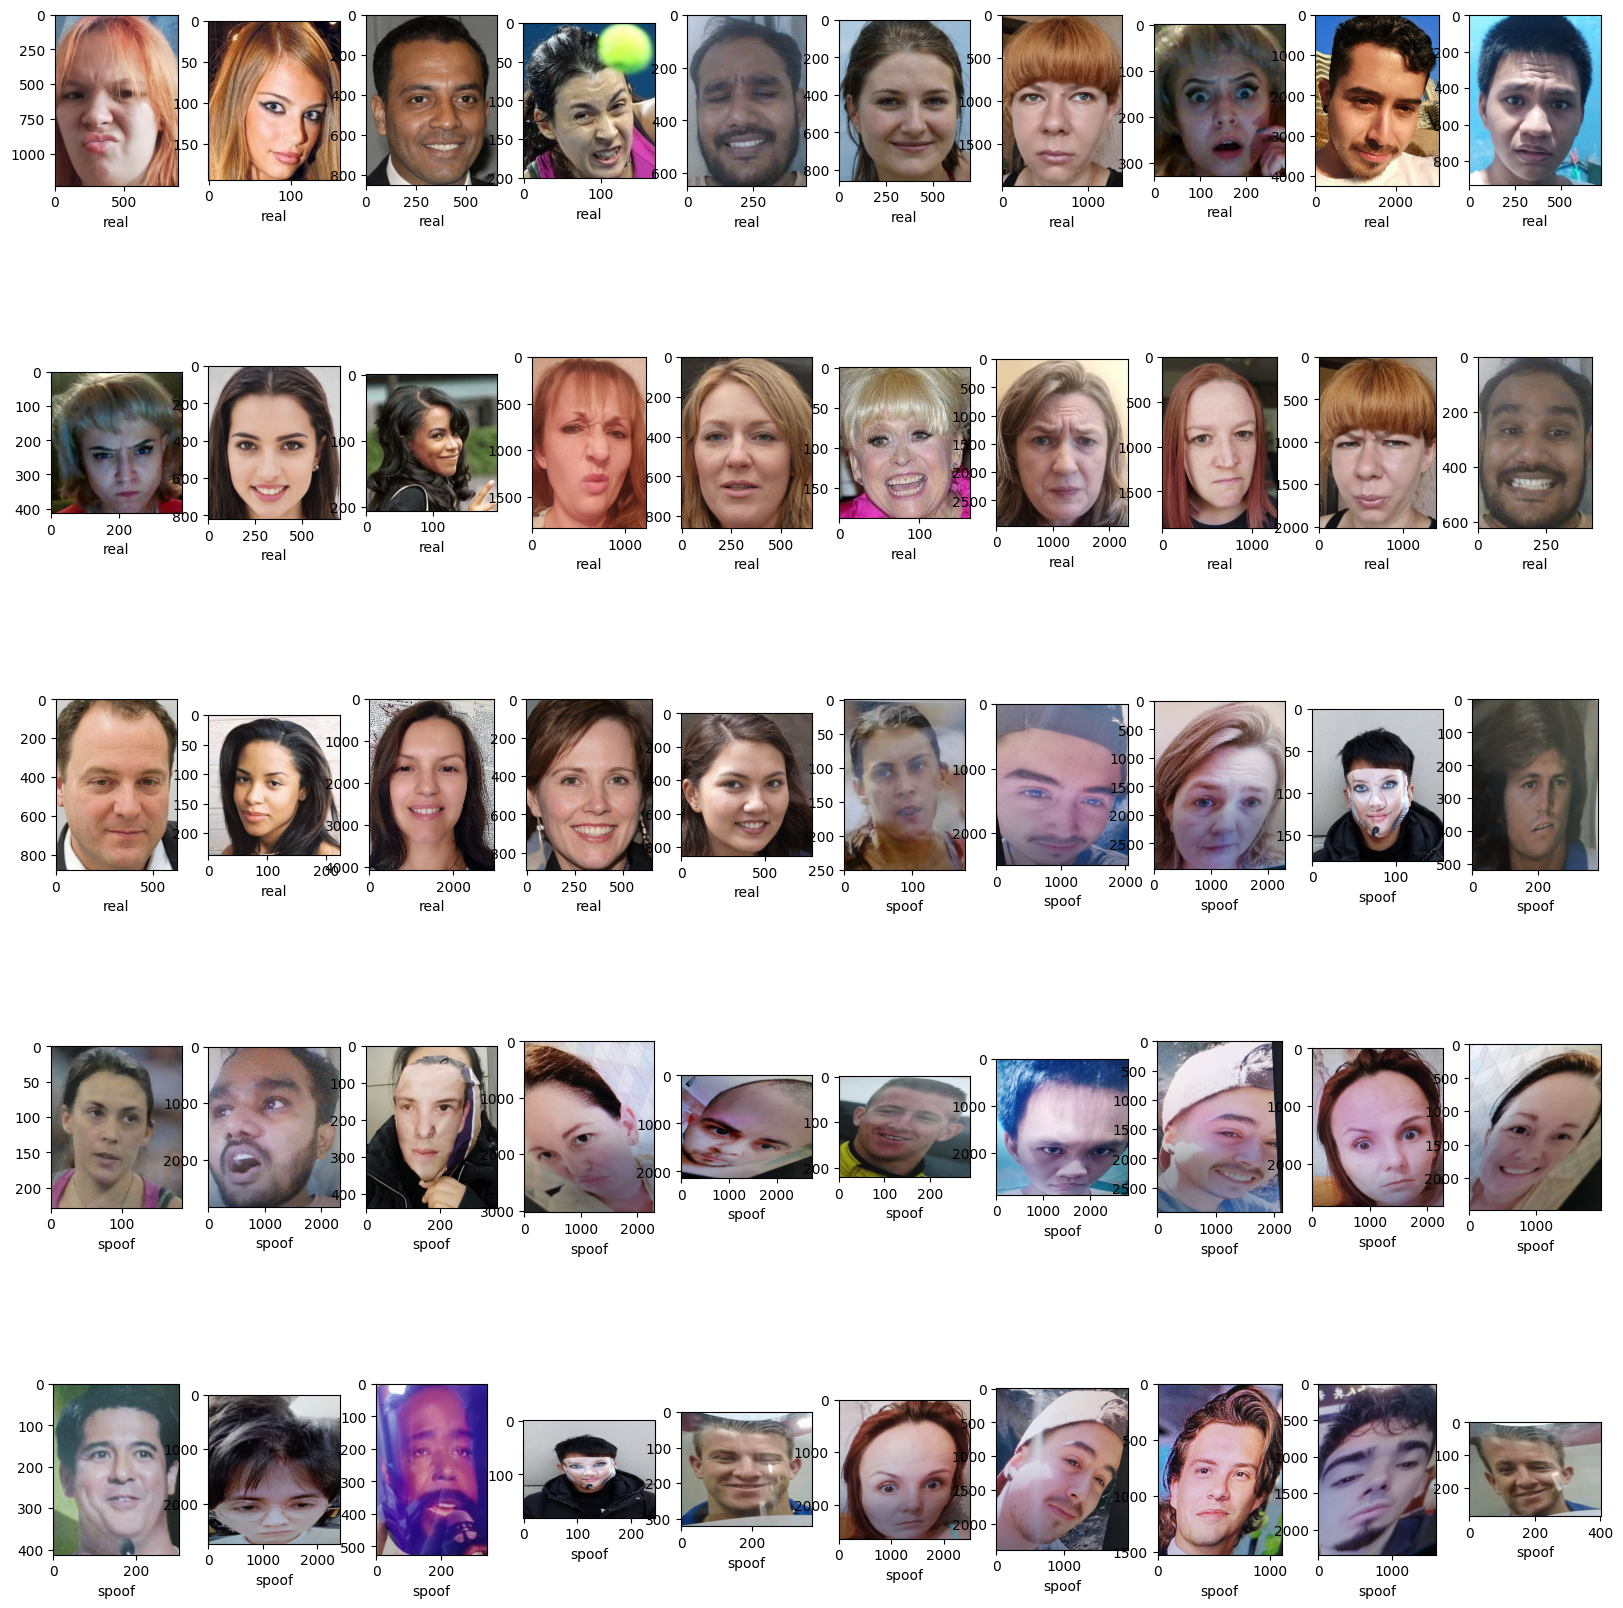

In [ ]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

### Visualización del dataset de "Test" o "Prueba"

In [ ]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['/content/antispoofing_dataset/test/real/persona8.10.jpg', '/content/antispoofing_dataset/test/real/Captura104.JPG', '/content/antispoofing_dataset/test/real/persona31.8.jpg', '/content/antispoofing_dataset/test/real/persona2.12.jpg', '/content/antispoofing_dataset/test/real/persona11.09.jpg', '/content/antispoofing_dataset/test/real/Captura105.JPG', '/content/antispoofing_dataset/test/real/persona4.14.jpg', '/content/antispoofing_dataset/test/real/Captura138.JPG', '/content/antispoofing_dataset/test/real/Captura129.JPG', '/content/antispoofing_dataset/test/real/persona6.13.jpg', '/content/antispoofing_dataset/test/real/Captura123.JPG', '/content/antispoofing_dataset/test/real/Captura97.JPG', '/content/antispoofing_dataset/test/real/persona30.7.jpg', '/content/antispoofing_dataset/test/real/Captura96.JPG', '/content/antispoofing_dataset/test/real/Captura132.JPG', '/content/antispoofing_dataset/test/real/persona17.13.jpeg', '/content/antispoofing_dataset/test/real/persona37.6.jpg', '/c

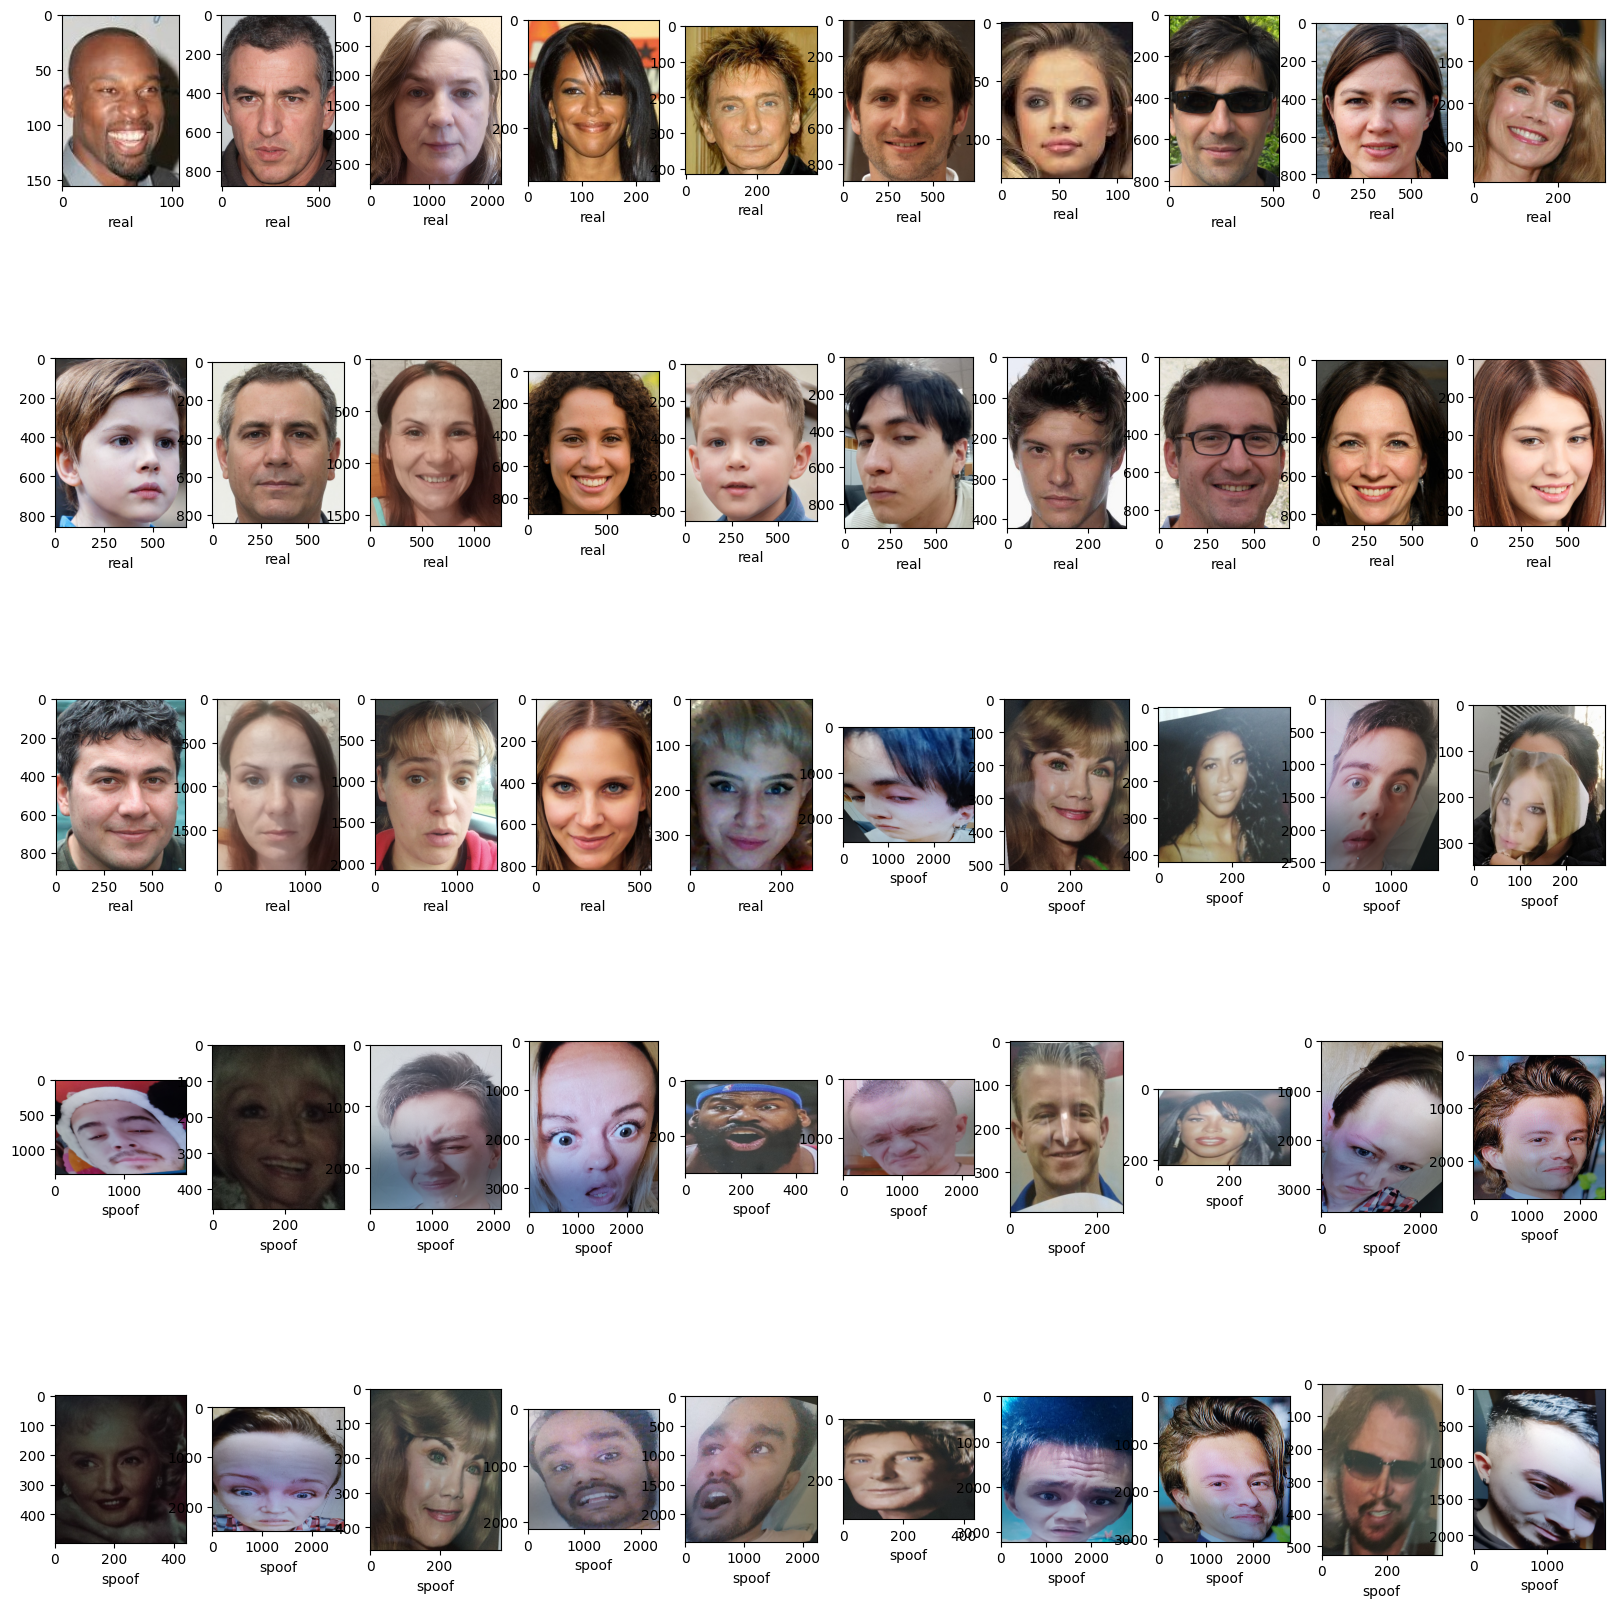

In [ ]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

### Análisis

Como se puede ver, se ha logrado que las imagenes que corresponden al dataset previamente hecho, que incluye imagenes de un dataset de Kaggle y además imagenes nuestras, que despues fueron procesadas para que quedaran como "spoof" o "falsas", sean parte de la estructura y queden correctamente añadidas a ella.

###Conclusiones

Estos pasos son esenciales para ya despues empezar con la arquitectura del modelo.

Se ha podido cargar las imagenes del dataset, y ver como se han incluido correctamente en la estructura definida, además de haberse diversificado correctamente en una proporción optima para el desarrollo del modelo.
Algo que destaca es que las imagenes del dataset si bien han sido recortadas para que solo se enfoquen en la cara de las personas, Estas no tienen estandarizadas sus dimensiones, es decir que no todas tienen las mismas dimensiones, algo que en algun momento pueda afectar al rendimiento del entrenamiento del modelo o que quizas si las tuviese este mismo responderia mucho mejor.

## Creación, Entrenamiento y Validación

### Pasos a seguir para el entrenamiento del modelo - Versión final:

- 1. Elegir el framework e importar las librerias necesarias
- 2. Cargar el dataset y añadir image augmentation
- 3. Crear el modelo


#### Paso 1: Librerias y framework
Elegiremos Keras como framework para facilitar el desarrollo del modelo

Además utilizaremos Adam como optimizador

ImageDataGenerator como aumentador de imagenes

ModelCheckpoint como callback para guardar el mejor modelo


In [ ]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

#### Paso 2: Cargar dataset
Cargamos el dataset y además asignamos las modificaciones a las imagenes mediante ImageDataGenerator

Siendo estas:

- Ajustes de brillo
- Ajustes de rotación
- Ajustes de desplazamiento
- Ajustes de cizallamiento
- Ajustes de zoom
- Escalamiento de pixeles

Esta parte del código utiliza la clase ImageDataGenerator de Keras para realizar aumentación de datos en las imágenes del conjunto de entrenamiento y normalización en las del conjunto de prueba. La aumentación incluye cambios en la luminosidad, rotación, traslación, relleno, cizallamiento y zoom. Después, se crean generadores de flujo de datos para los conjuntos de entrenamiento y prueba, redimensionando las imágenes a un tamaño específico y normalizándolas para prepararlas para su uso en un modelo de aprendizaje automático. El parámetro class_mode se establece en 'binary' debido a que el modelo está diseñado para la clasificación binaria. El tamaño del lote (batch_size) se establece en 25, y los generadores están configurados para barajar las imágenes del conjunto de entrenamiento.


In [ ]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 754 images belonging to 2 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 277 images belonging to 2 classes.


#### Paso 3: Creando nuestro modelo - Versión Final



##### Construcción de la arquitectura del modelo

Para empezar, importamos las librerias necesarias para la construccion e nuestro modelo, el cual cuenta con 3 capas convulocionales y además

1)Capas Dropout (0.1 - 0.3).

2)Learning Rate: learning rate del optimizador Adam a 0.0001, Beta_1 = 0.9,
Beta_2 = 0.999 y epsilon= 1e-07.

3)EarlyStopping: EarlyStopping con paciencia = 4 para monitorear la pérdida (val_loss) .

4)Batch Size y Épocas: tamaño del lote (batch_size) a 25 y el número de épocas a 50.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()

# Capa convolucional 1
model.add(Conv2D(32, (3, 3), input_shape=(160, 160, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 3
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa Fully Connected
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))


from keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Compilar el modelo
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(
        learning_rate=0.0001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    ),
    metrics=['accuracy']
)


Creamos un directorio para los pesos del modelo

In [ ]:
import os
os.mkdir('/content/modelweights/')

In [ ]:
model_checkpoint = ModelCheckpoint('./modelweights/model_original_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, save_weights_only=True)

### Entrenamiento y validación

In [ ]:
history_original = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 25,
    epochs = 50,
    callbacks=[early_stopping, model_checkpoint]
)



Epoch 1/50
30/30 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.6008
Epoch 1: val_loss improved from inf to 0.61787, saving model to ./modelweights/model_original_01-0.774545.h5
30/30 [==============================] - 33s 1s/step - loss: 0.6667 - accuracy: 0.6008 - val_loss: 0.6179 - val_accuracy: 0.7745
Epoch 2/50
30/30 [==============================] - ETA: 0s - loss: 0.5799 - accuracy: 0.7339
Epoch 2: val_loss improved from 0.61787 to 0.54289, saving model to ./modelweights/model_original_02-0.767273.h5
30/30 [==============================] - 32s 1s/step - loss: 0.5799 - accuracy: 0.7339 - val_loss: 0.5429 - val_accuracy: 0.7673
Epoch 3/50
30/30 [==============================] - ETA: 0s - loss: 0.5447 - accuracy: 0.7243
Epoch 3: val_loss improved from 0.54289 to 0.51959, saving model to ./modelweights/model_original_03-0.770909.h5
30/30 [==============================] - 28s 961ms/step - loss: 0.5447 - accuracy: 0.7243 - val_loss: 0.5196 - val_accuracy: 

#### Grafico accuracy

* Resultados de entrenamiento: accuracy train: 86% - loss train: 31%.
* Resultados de validación: val accuracy: 90% - val loss: 28%.
* Se utilizó early stopping p=4, aun así se llego al máximo de épocas definido (50).
* Se pudo observar que si se seguia entrenando el modelo, el porcentaje de val loss iría en aumento.
* El monitoreo de la tendencia sugiere que se podría alcanzar un punto de sobreajuste si el entrenamiento se extendiera más allá del límite actual.

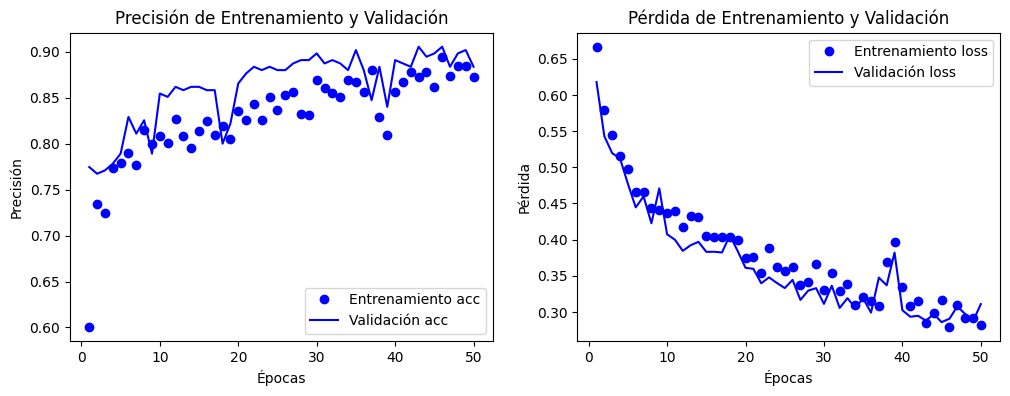

In [ ]:
import matplotlib.pyplot as plt

# Accediendo a los datos de precisión y pérdida
acc = history_original.history['accuracy']
val_acc = history_original.history['val_accuracy']
loss = history_original.history['loss']
val_loss =history_original.history['val_loss']
epochs = range(1, len(acc) + 1)

# Gráfico de precisión (accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.plot(epochs, val_acc, 'b', label='Validación acc')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


####Matriz de confusión y metricas
* El modelo muestra un alto rendimiento con una precisión global y una puntuación F1 ponderada de 0.90.
* El modelo es ligeramente mejor identificando imágenes 'spoof' (126 correctas) que imágenes 'reales' (122 correctas).
* La precisión es bastante equilibrada entre las clases 'real' (0.92) y 'spoof' (0.88).
* Existen algunas diferencias menores en la clasificación, con 18 falsos negativos para 'real' y 11 para 'spoof', lo que indica un pequeño sesgo hacia falsos 'spoof'.


Found 277 images belonging to 2 classes.
12/12 [==============================] - 6s 471ms/step


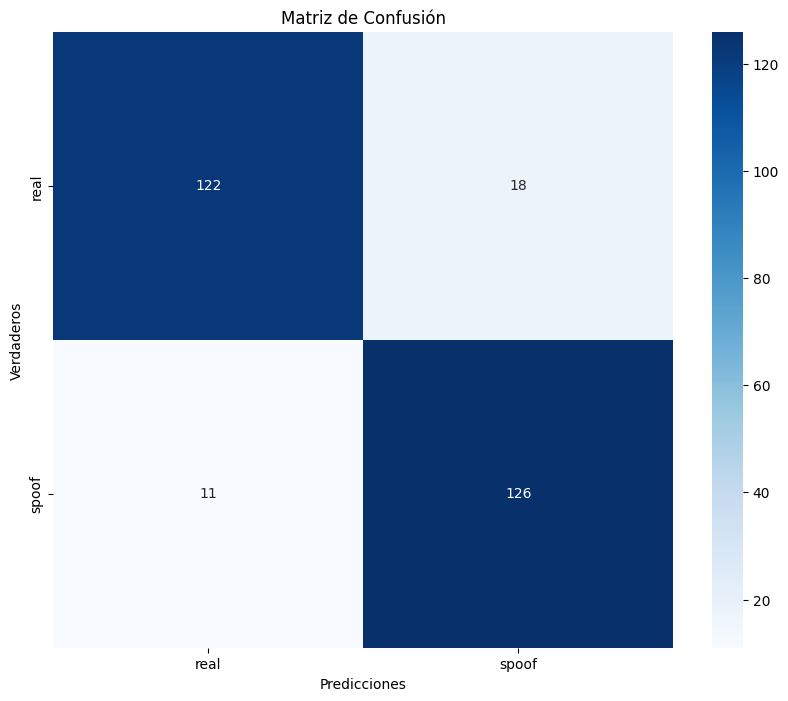

              precision    recall  f1-score   support

        real       0.92      0.87      0.89       140
       spoof       0.88      0.92      0.90       137

    accuracy                           0.90       277
   macro avg       0.90      0.90      0.90       277
weighted avg       0.90      0.90      0.90       277



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

#Supongamos que ya tienes un modelo entrenado 'model' y un generador 'valid_datagen'
#Asegúrate de que el generador de validación no baraja los datos
valid_generator = valid_datagen.flow_from_directory(
    test_dir,  # Asegúrate de reemplazar 'test_dir' con tu directorio de validación
    target_size=(160, 160),
    color_mode='rgb',
    class_mode='binary',
    batch_size=25,
    shuffle=False  # Importante para mantener el orden
)

#Obtener las predicciones del modelo
predictions = model.predict(valid_generator)
#Las predicciones están en términos de probabilidades, las convertimos a etiquetas binarias
predicted_classes = np.where(predictions > 0.5, 1, 0)

#Obtener las etiquetas verdaderas del generador de validación
true_classes = valid_generator.classes

#Generar la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes.flatten())

#Generar el reporte de clasificación
report = classification_report(true_classes, predicted_classes.flatten(), target_names=valid_generator.class_indices.keys())

#Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

#Imprimir el reporte de clasificación
print(report)

## Test

### Test de predicción
Utiliza el modelo previamente entrenado para predecir si las imágenes son reales o falsas (spoof). Se itera sobre las imágenes en el directorio proporcionado y se carga cada imagen, se redimensiona al tamaño requerido por el modelo, se normaliza y se realiza una predicción. Las predicciones se clasifican en categorías basadas en un umbral de 0.5, y se cuenta cuántas imágenes se predicen como reales y cuántas como falsas. La función devuelve un diccionario que contiene el recuento de imágenes predichas en cada categoría ('real' o 'spoof').


In [ ]:
import itertools


In [ ]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [ ]:
check_fakes(test_dir,categories[1])

1/1 [==============================] - 0s 28ms/step


{'spoof': 126, 'real': 11}

In [ ]:
check_fakes(test_dir,categories[0])

1/1 [==============================] - 0s 26ms/step


{'real': 122, 'spoof': 18}

###Guardar modelo y pesos en archivos.

Se guarda el modelo en formato JSON y el peso en formato .H5 para su uso posterior.

In [ ]:
# Guardar el modelo en formato JSON
model_json = model.to_json()
with open("/content/antispoofing_model_original.json", "w") as json_file:
    json_file.write(model_json)


# Guardar los pesos del modelo en un archivo separado
model.save_weights("/content/antispoofing_model_original_weights.h5")

# Cargar el modelo
json_file = open('/content/antispoofing_model_original.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Cargar los pesos en el modelo nuevo
loaded_model.load_weights("/content/antispoofing_model_original_weights.h5")


###Inicializar camara

Se utiliza el codigo proporcionado por google colab para inicializar la camara.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


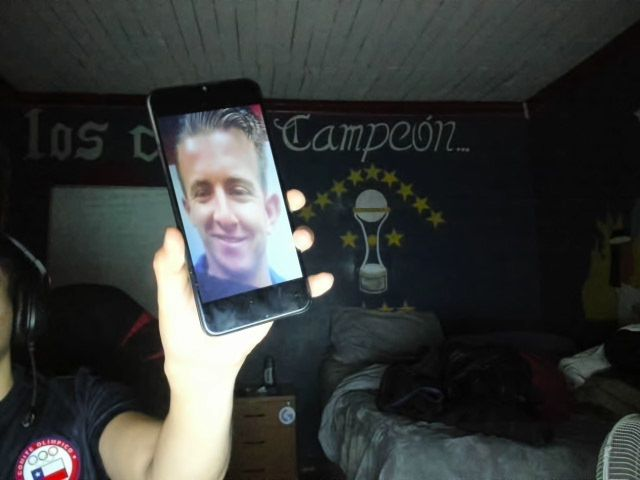

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


###Predicción de la foto tomada

Este código carga el modelo previamente entrenado para la detección de ataques de suplantación de identidad (spoofing) en sistemas de reconocimiento facial. Utiliza un modelo de red neuronal convolucional (CNN) cargado desde archivos JSON y pesos HDF5. Luego, utiliza el clasificador Haar Cascade de OpenCV para detectar rostros en una imagen proporcionada. Para cada rostro detectado, se realiza una predicción utilizando el modelo cargado, y se agrega un cuadro delimitador alrededor del rostro con una etiqueta indicando si se considera un rostro real o un intento de spoofing. La imagen resultante con los cuadros delimitadores y las etiquetas se muestra al final del proceso.

1/1 [==============================] - 0s 80ms/step


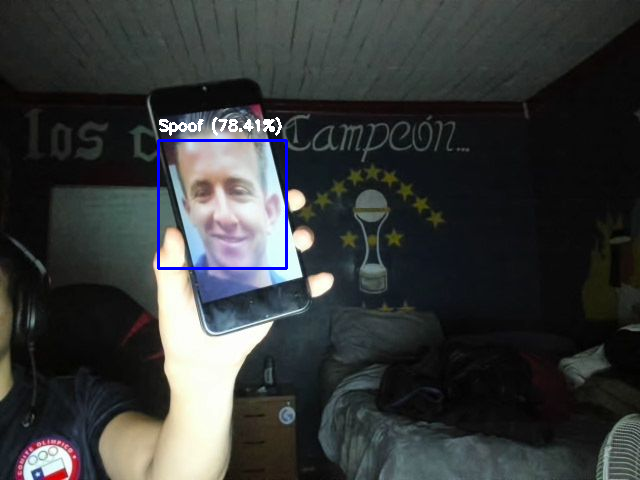

In [ ]:
import cv2
from keras.models import model_from_json
import numpy as np
from google.colab.patches import cv2_imshow

# Función para preprocesar la imagen
def preprocess_image(image):
    image = cv2.resize(image, (160, 160))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Cargar el modelo
json_file = open('/content/antispoofing_model_original.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/antispoofing_model_original_weights.h5")

# Inicializar el clasificador Haar Cascade para la detección de rostros
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

# Cargar la imagen
filename = 'photo.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detectar rostros en la imagen
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    face = img[y:y+h, x:x+w]
    preprocessed_face = preprocess_image(face)

    # Hacer la predicción
    prediction = loaded_model.predict(preprocessed_face)[0]
    prediction_percentage = prediction[0] * 100
    label = "Real" if prediction < 0.5 else "Spoof"
    cv2.putText(img, f'{label} ({prediction_percentage:.2f}%)', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Mostrar la imagen con los bounding boxes
cv2_imshow(img)

###Guardar imagen en algun directorio.

In [ ]:
save_path = '/content/gdrive/MyDrive/trabajo lab 4 y 5 IA/Fotos_predichas/processed_photo_original1.jpg'

cv2.imwrite(save_path, img)

True

###Conexión de video en tiempo real

Este código establece una conexión de video en tiempo real desde la cámara web en Colab. Utiliza funciones de JavaScript para crear un elemento de video y capturar fotogramas de la cámara web. La función video_frame se encarga de mostrar la transmisión de video en Colab, mientras que las funciones js_to_image y display_video_frame se utilizan para convertir y mostrar las imágenes. Además, se utiliza el clasificador de Haar Cascade de OpenCV para detectar rostros en los fotogramas del video.

La función video_stream crea un contenedor HTML para mostrar el video y manejar eventos. El código también inicializa el modelo de detección de rostros Haar Cascade.

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from keras.preprocessing import image
import numpy as np
import cv2
import PIL
from base64 import b64decode
from IPython.display import display, Image

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes



# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data


from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
import cv2
import PIL
import io
import html
from keras.preprocessing import image
import numpy as np
import cv2
import PIL
from base64 import b64decode
from IPython.display import display, Image

# Función para convertir el objeto JavaScript en una imagen de OpenCV
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

# Función para mostrar el video en Colab
def display_video_frame(image):
    _, buffer = cv2.imencode('.jpeg', image)
    display(Image(data=buffer.tobytes()))


# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

###Predicción en tiempo real

* Se inicia la transmisión de video desde la cámara web en Colab y captura los fotogramas del video. Utiliza el modelo de detección de rostros Haar Cascade de OpenCV para identificar caras en cada fotograma. Luego, utiliza un modelo de clasificación (model) para predecir si la cara es auténtica ("Live/real") o falsa ("Spoofing"). La predicción y el porcentaje de confianza se superponen en el video junto con un cuadro delimitador alrededor de la cara detectada. Este proceso se repite continuamente en un bucle, actualizando la superposición y la predicción en cada fotograma. La superposición incluye un cuadro delimitador, la etiqueta de predicción y el porcentaje de confianza.

* El umbral queda a criterio del usuario, un porcentaje mayor del umbral aumenta el porcentaje de confianza del modelo.

* La clase positivas es "spoof"


In [ ]:
#start streaming video from webcam
video_stream()

# label for video
label_html = 'Capturing...'

# initializar bounding box a vacío
bbox = ''

count = 0

while True:
    js_reply = video_frame(label_html, bbox)

    if not js_reply:
        break

    # convertir la respuesta JS a una imagen OpenCV
    img = js_to_image(js_reply["img"])

    # crear superposición transparente para la caja delimitadora
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # escala de grises para la detección de rostros
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # obtener coordenadas de la región facial
    faces = face_cascade.detectMultiScale(gray)

    # obtener cuadro delimitador de la cara para la superposición y realizar la predicción
    for (x, y, w, h) in faces:
        # Recortar la región facial y redimensionar al tamaño de entrada del modelo
        face_roi = cv2.resize(img[y:y + h, x:x + w], (160, 160))
        face_roi = np.expand_dims(face_roi, axis=0) / 255.0
        results = model.predict(face_roi)

        # Usar la predicción como etiqueta
        prediction_label = "Live" if results < 0.5 else "Spoofing"

        # Dibujar el cuadro delimitador en la superposición
        bbox_array = cv2.rectangle(bbox_array, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Agregar la etiqueta de predicción con el porcentaje al cuadro delimitador
        label_with_percentage = f"{prediction_label} ({results[0][0]*100:.2f}%)"
        bbox_array = cv2.putText(bbox_array, label_with_percentage, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                                 (255, 255, 255), 1, cv2.LINE_AA)

    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
    # convertir superposición de cuadro delimitador en bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # actualizar bbox para que el próximo fotograma obtenga una nueva superposición
    bbox = bbox_bytes

## Conclusiones

* El modelo propio esta creado para predecir la clase positiva -> “Spoof”
* El modelo tiene “buenos” resultados porque esta correctamente equilibrado.
* El modelo presenta perdidas de datos debido al sobreajuste.



##Recomendaciones
* Aumentar el conjunto de datos pero manteniendo la estrategia para combatir el desequilibrio
* Probar con nueva arquitectura y otros hiperparametros.
* Cambiar el umbral a uno mayor para ver la   credibilidad del modelo, esto aplica para las fotos y el live.
* Probar con nuevas fotos que cumplan los requisitos que contienen las etiquetas spoof
* Corroborar si el estandarizado y el rescalado afecta a la calidad de la foto (perdida de información)
* Comprobar con otros tipos de spoofing (Imágenes sintéticas, mascaras, mascarillas, etc)

--------------------------------------
## Modelo antiguo - Version mala

Se habia realizado un modelo el cual tuvo bajo rendimiento, este fue realizado en otro colab, para poder visualizar este modelo se tuvo que colocar despues de nuestro modelo final para que este no perdiera los resultados obtenidos ni el analisis respectivo.

### Construccion de la arquitectura

#### Paso 1: Librerias y framework
Elegiremos Keras como framework para facilitar el desarrollo del modelo

Además utilizaremos Adam como optimizador

ImageDataGenerator como aumentador de imagenes

ModelCheckpoint como callback para guardar el mejor modelo

In [ ]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

#### Paso 2: Creando nuestro modelo malo (cambiar respecto a la arquitectura)
Para empezar, importamos las librerias necesarias para la construccion de nuestro modelo, el cual cuenta con 3 capas convulocionales y además

1)Capas Dropout (0.3).

2)Learning Rate: learning rate del optimizador Adam a 0.0001

3)EarlyStopping: EarlyStopping con paciencia = 4 para monitorear la pérdida (val_loss) .

4)Batch Size y Épocas: tamaño del lote (batch_size) a 25 y el número de épocas a 30.

##### Construcción de la arquitectura del modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Dense

model = Sequential()

# Capa convolucional 1
model.add(Conv2D(32, (3, 3), input_shape=(160, 160, 3)))
model.add(Activation('relu'))

# Capa convolucional 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# Capa Fully Connected
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))


from keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min', restore_best_weights=True)

# Compilar el modelo
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(
        learning_rate=0.0001,
    ),
    metrics=['accuracy']
)

#### Paso 3: Definiendo los checkpoints
Definimos los parametros del early stopping y del model checkpoint, que se guarde el entrenamiento con el mejor valor para el "val_loss"

In [ ]:
model_checkpoint = ModelCheckpoint('./modelweights/model_original_malo{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, save_weights_only=True)

### Entrenamiento y validación

In [ ]:
history_original_malo = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 25,
    epochs = 30,
    callbacks=[early_stopping,model_checkpoint]
)


Epoch 1/30
30/30 [==============================] - ETA: 0s - loss: 0.8776 - accuracy: 0.6365
Epoch 1: val_loss improved from inf to 0.49469, saving model to ./modelweights/model_original_malo01-0.767273.h5
30/30 [==============================] - 42s 939ms/step - loss: 0.8776 - accuracy: 0.6365 - val_loss: 0.4947 - val_accuracy: 0.7673
Epoch 2/30
30/30 [==============================] - ETA: 0s - loss: 0.5131 - accuracy: 0.7490
Epoch 2: val_loss improved from 0.49469 to 0.39959, saving model to ./modelweights/model_original_malo02-0.800000.h5
30/30 [==============================] - 30s 988ms/step - loss: 0.5131 - accuracy: 0.7490 - val_loss: 0.3996 - val_accuracy: 0.8000
Epoch 3/30
30/30 [==============================] - ETA: 0s - loss: 0.4728 - accuracy: 0.7737
Epoch 3: val_loss did not improve from 0.39959
30/30 [==============================] - 29s 971ms/step - loss: 0.4728 - accuracy: 0.7737 - val_loss: 0.4060 - val_accuracy: 0.7782
Epoch 4/30
30/30 [===========================

#### Gráficos, Matriz de Confusión y métricas

##### Grafico accuracy (cambiar numeros)

* Resultados de entrenamiento: accuracy train: 75% - loss train: 51%.
* Resultados de validación: val accuracy: 76% - val loss: 49%.
* Se utilizó early stopping p=4, llego solo a la 6ta epoca, asi no aprovechando correctamente esta herramienta.
* El monitoreo de la tendencia sugiere que se podría alcanzar un punto de sobreajuste si el entrenamiento se extendiera más allá del límite actual.

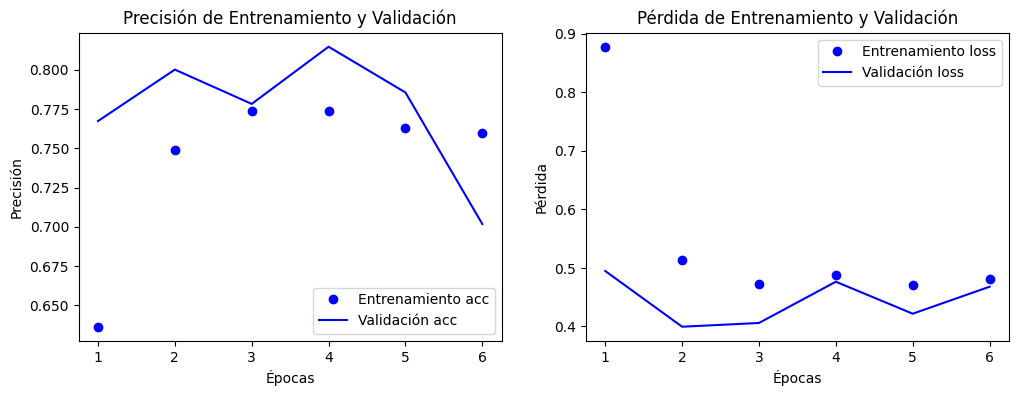

In [ ]:
import matplotlib.pyplot as plt

# Accediendo a los datos de precisión y pérdida
acc = history_original_malo.history['accuracy']
val_acc = history_original_malo.history['val_accuracy']
loss = history_original_malo.history['loss']
val_loss =history_original_malo.history['val_loss']
epochs = range(1, len(acc) + 1)

# Gráfico de precisión (accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.plot(epochs, val_acc, 'b', label='Validación acc')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


##### Matriz de confusión y metricas
* El modelo muestra un buen rendimiento pero no mejor que el modelo final,una precisión global y una puntuación F1 ponderada de 0.80.
* El modelo es ligeramente mejor identificando imágenes 'real' (120 correctas) que imágenes 'spoof' (102 correctas).
* La precisión es bastante equilibrada entre las clases 'real' (0.77) y 'spoof' (0.84).
* Existen algunas diferencias menores en la clasificación, con 20 falsos negativos para 'real' y 35 para 'spoof', lo que indica un pequeño sesgo hacia falsos 'real'.

Found 277 images belonging to 2 classes.
12/12 [==============================] - 5s 440ms/step


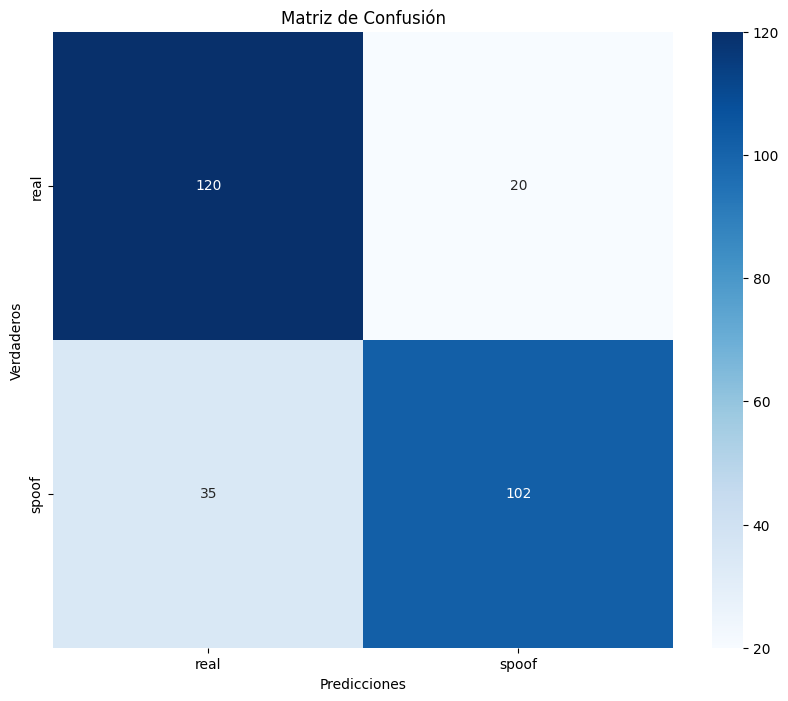

              precision    recall  f1-score   support

        real       0.77      0.86      0.81       140
       spoof       0.84      0.74      0.79       137

    accuracy                           0.80       277
   macro avg       0.81      0.80      0.80       277
weighted avg       0.80      0.80      0.80       277



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

#Supongamos que ya tienes un modelo entrenado 'model' y un generador 'valid_datagen'
#Asegúrate de que el generador de validación no baraja los datos
valid_generator = valid_datagen.flow_from_directory(
    test_dir,  # Asegúrate de reemplazar 'test_dir' con tu directorio de validación
    target_size=(160, 160),
    color_mode='rgb',
    class_mode='binary',
    batch_size=25,
    shuffle=False  # Importante para mantener el orden
)

#Obtener las predicciones del modelo
predictions = model.predict(valid_generator)
#Las predicciones están en términos de probabilidades, las convertimos a etiquetas binarias
predicted_classes = np.where(predictions > 0.5, 1, 0)

#Obtener las etiquetas verdaderas del generador de validación
true_classes = valid_generator.classes

#Generar la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes.flatten())

#Generar el reporte de clasificación
report = classification_report(true_classes, predicted_classes.flatten(), target_names=valid_generator.class_indices.keys())

#Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

#Imprimir el reporte de clasificación
print(report)

###Test de predicción

In [ ]:
import itertools

In [ ]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [ ]:
check_fakes(test_dir,categories[1])

1/1 [==============================] - 0s 28ms/step


{'spoof': 102, 'real': 35}

In [ ]:
check_fakes(test_dir,categories[0])

1/1 [==============================] - 0s 93ms/step


{'real': 120, 'spoof': 20}

####Guardar modelo y pesos en archivos.

Se guarda el modelo en formato JSON y el peso en formato .H5 para su uso posterior.

In [ ]:
# Guardar el modelo en formato JSON
model_json = model.to_json()
with open("/content/antispoofing_model_original_malo.json", "w") as json_file:
    json_file.write(model_json)


# Guardar los pesos del modelo en un archivo separado
model.save_weights("/content/antispoofing_model_original_weights_malo.h5")

# Cargar el modelo
json_file = open('/content/antispoofing_model_original_malo.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Cargar los pesos en el modelo nuevo
loaded_model.load_weights("/content/antispoofing_model_original_weights_malo.h5")

####Inicializar camara

Se utiliza el codigo proporcionado por google colab para inicializar la camara.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


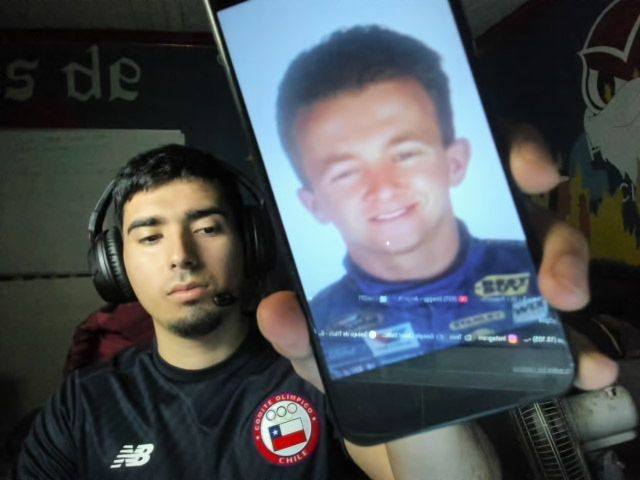

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


####Predicción de la foto tomada

Se puede visualizar que el modelo malo tiene problemas para hacer las respectivas predicciones, tomando como una cara real como spoof esto se puede deber al mal rendimiento del entrenamiento y a la calidad de las fotos.


1/1 [==============================] - 0s 18ms/step


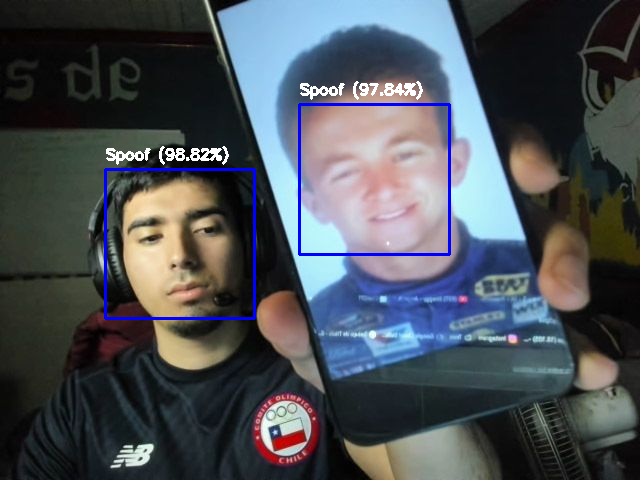

In [ ]:
import cv2
from keras.models import model_from_json
import numpy as np
from google.colab.patches import cv2_imshow

# Función para preprocesar la imagen
def preprocess_image(image):
    image = cv2.resize(image, (160, 160))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Cargar el modelo
json_file = open('/content/antispoofing_model_original_malo.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/antispoofing_model_original_weights_malo.h5")

# Inicializar el clasificador Haar Cascade para la detección de rostros
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

# Cargar la imagen
filename = 'photo.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detectar rostros en la imagen
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    face = img[y:y+h, x:x+w]
    preprocessed_face = preprocess_image(face)

    # Hacer la predicción
    prediction = loaded_model.predict(preprocessed_face)[0]
    prediction_percentage = prediction[0] * 100
    label = "Real" if prediction < 0.5 else "Spoof"
    cv2.putText(img, f'{label} ({prediction_percentage:.2f}%)', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Mostrar la imagen con los bounding boxes
cv2_imshow(img)

####Guardar imagen en algun directorio.

In [ ]:
save_path = '/content/gdrive/MyDrive/trabajo lab 4 y 5 IA/Fotos_predichas/processed_photo_original_malo1.jpg'

cv2.imwrite(save_path, img)

True

### Segunda predicción tomada con el modelo malo

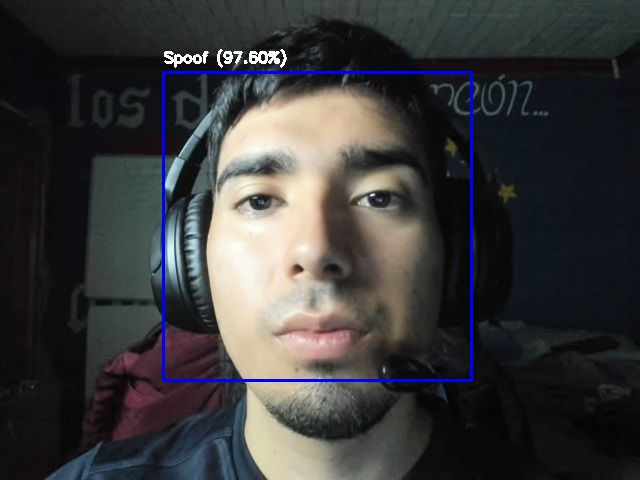

In [ ]:
from IPython.display import Image, display

# Ruta de la imagen
ruta_imagen = "/content/gdrive/MyDrive/trabajo lab 4 y 5 IA/Fotos_predichas/processed_photo_original_malo1.jpg"

# Mostrar la imagen
display(Image(filename=ruta_imagen))


####Conexión de video en tiempo real


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from keras.preprocessing import image
import numpy as np
import cv2
import PIL
from base64 import b64decode
from IPython.display import display, Image

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data


from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
import cv2
import PIL
import io
import html
from keras.preprocessing import image
import numpy as np
import cv2
import PIL
from base64 import b64decode
from IPython.display import display, Image

# Función para convertir el objeto JavaScript en una imagen de OpenCV
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

# Función para mostrar el video en Colab
def display_video_frame(image):
    _, buffer = cv2.imencode('.jpeg', image)
    display(Image(data=buffer.tobytes()))


# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

####Predicción en tiempo real

* El umbral queda a criterio del usuario, un porcentaje mayor del umbral aumenta el porcentaje de confianza del modelo.

* La clase positivas es "spoof"

In [ ]:
#start streaming video from webcam
video_stream()

# label for video
label_html = 'Capturing...'

# initializar bounding box a vacío
bbox = ''

count = 0

while True:
    js_reply = video_frame(label_html, bbox)

    if not js_reply:
        break

    # convertir la respuesta JS a una imagen OpenCV
    img = js_to_image(js_reply["img"])

    # crear superposición transparente para la caja delimitadora
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # escala de grises para la detección de rostros
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # obtener coordenadas de la región facial
    faces = face_cascade.detectMultiScale(gray)

    # obtener cuadro delimitador de la cara para la superposición y realizar la predicción
    for (x, y, w, h) in faces:
        # Recortar la región facial y redimensionar al tamaño de entrada del modelo
        face_roi = cv2.resize(img[y:y + h, x:x + w], (160, 160))
        face_roi = np.expand_dims(face_roi, axis=0) / 255.0
        results = model.predict(face_roi)

        # Usar la predicción como etiqueta
        prediction_label = "Live" if results < 0.5 else "Spoofing"

        # Dibujar el cuadro delimitador en la superposición
        bbox_array = cv2.rectangle(bbox_array, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Agregar la etiqueta de predicción con el porcentaje al cuadro delimitador
        label_with_percentage = f"{prediction_label} ({results[0][0]*100:.2f}%)"
        bbox_array = cv2.putText(bbox_array, label_with_percentage, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                                 (255, 255, 255), 1, cv2.LINE_AA)

    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
    # convertir superposición de cuadro delimitador en bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # actualizar bbox para que el próximo fotograma obtenga una nueva superposición
    bbox = bbox_bytes

### Análisis y conclusiones

El modelo malo tiene bastantes problemas para identificar correctamente la clase real, esto puede ser debido a el bajo rendimiento del entrenamiento, ademas de un mal ajuste de hiperparametros. Ocupamos estas herramientas para mejorar el modelo y con eso se llego al modelo final que se encuentra al inicio de este colab.

--------------------------------
# PARTE 2: Aplicando transfer learning y otros modelos

## MobileNetV2

Se eligio esta arquitectura porque se utilizo un codigo de referencia el cual entregaba buenos resultados.

referencia: https://www.youtube.com/watch?v=aGSR_3IEIwc&t=40s



###Cargando modelo preentrenado

)Capas Dropout (0.3).

2)Learning Rate: learning rate del optimizador Adam a 0.0001, Beta_1 = 0.9,
Beta_2 = 0.999 y epsilon= 1e-07.

3)EarlyStopping: EarlyStopping con paciencia = 4 para monitorear la pérdida (val_loss) .

4)Batch Size y Épocas: tamaño del lote (batch_size) a 25 y el número de épocas a 50.

5)Se agregan capas densas (completamente conectadas) para la clasificación. La capa de salida es otra capa densa con 1 unidad y la función de activación sigmoidal.

In [ ]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mobilenet.trainable = False

In [ ]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense( units=1,activation='sigmoid')(output)

In [ ]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[0][0]']        

###Hiperparametros y compilación del modelo

In [ ]:
from keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min', restore_best_weights=True)

# Compilar el modelo
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(
        learning_rate=0.0001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    ),
    metrics=['accuracy']
)


####Checkpoint pesos

In [ ]:
model_checkpoint = ModelCheckpoint('./modelweights/model_mobilenetV2_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

### Entrenamiento y validación

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 25,
    epochs = 50,
    callbacks=[model_checkpoint,early_stopping])

Epoch 1/50
30/30 [==============================] - ETA: 0s - loss: 0.5171 - accuracy: 0.7709
Epoch 1: val_loss improved from inf to 0.37943, saving model to ./modelweights/model_mobilenetV2_01-0.807273.h5
30/30 [==============================] - 41s 1s/step - loss: 0.5171 - accuracy: 0.7709 - val_loss: 0.3794 - val_accuracy: 0.8073
Epoch 2/50
30/30 [==============================] - ETA: 0s - loss: 0.3367 - accuracy: 0.8491
Epoch 2: val_loss improved from 0.37943 to 0.31085, saving model to ./modelweights/model_mobilenetV2_02-0.861818.h5
30/30 [==============================] - 30s 1s/step - loss: 0.3367 - accuracy: 0.8491 - val_loss: 0.3109 - val_accuracy: 0.8618
Epoch 3/50
30/30 [==============================] - ETA: 0s - loss: 0.2942 - accuracy: 0.8793
Epoch 3: val_loss improved from 0.31085 to 0.24967, saving model to ./modelweights/model_mobilenetV2_03-0.887273.h5
30/30 [==============================] - 35s 1s/step - loss: 0.2942 - accuracy: 0.8793 - val_loss: 0.2497 - val_accu

####Grafico accuracy

Resultados de entrenamiento: accuracy train: 94% - loss train: 16%
Resultados de validación: val accuracy: 92% - val loss: 18%

La precisión tanto en entrenamiento como en validación muestra una estabilización después de las primeras épocas
El early stopping se ejecuto correctamente en la época 17.

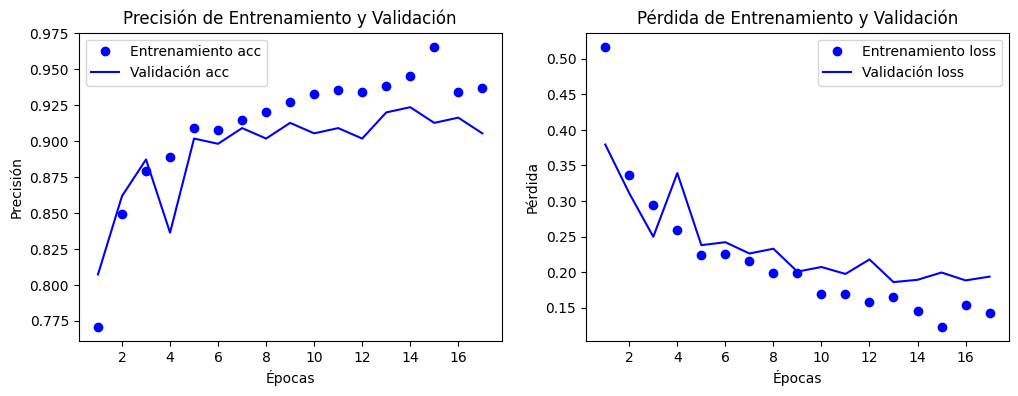

In [ ]:
import matplotlib.pyplot as plt

# Accediendo a los datos de precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Gráfico de precisión (accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.plot(epochs, val_acc, 'b', label='Validación acc')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()



####Matriz de confusión y metricas
* El modelo muestra un alto rendimiento con una precisión global y una puntuación F1 ponderada de 0.92.
* El modelo es ligeramente mejor identificando imágenes 'real' (134 correctas) que imágenes 'spoof' (120 correctas).
* La precisión es bastante equilibrada entre las clases 'real' (0.89) y 'spoof' (0.95).
* Existen algunas diferencias menores en la clasificación, con 6 falsos negativos para 'real' y 17 para 'spoof'.


Found 277 images belonging to 2 classes.


12/12 [==============================] - 6s 501ms/step


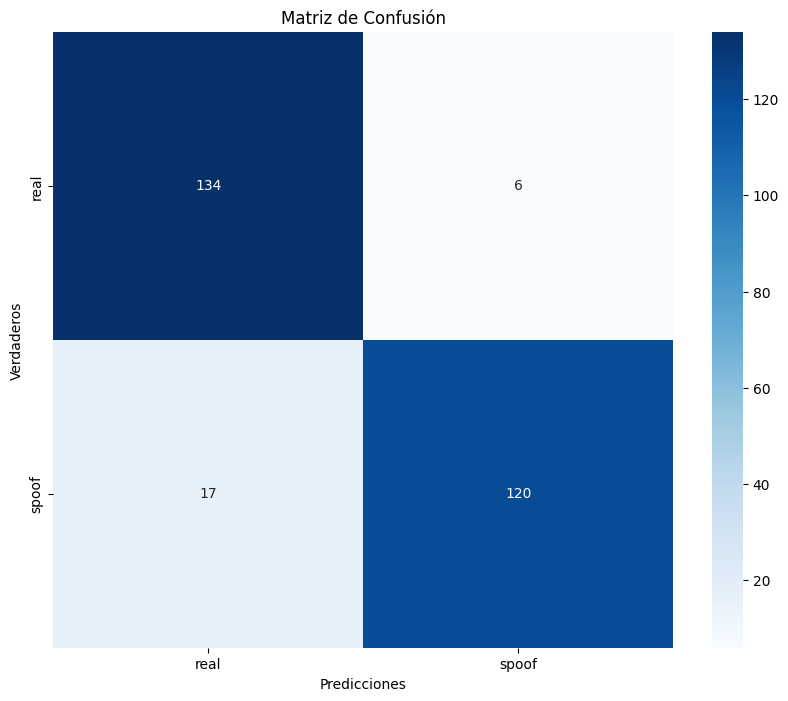

              precision    recall  f1-score   support

        real       0.89      0.96      0.92       140
       spoof       0.95      0.88      0.91       137

    accuracy                           0.92       277
   macro avg       0.92      0.92      0.92       277
weighted avg       0.92      0.92      0.92       277



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

#Supongamos que ya tienes un modelo entrenado 'model' y un generador 'valid_datagen'
#Asegúrate de que el generador de validación no baraja los datos
valid_generator = valid_datagen.flow_from_directory(
    test_dir,  # Asegúrate de reemplazar 'test_dir' con tu directorio de validación
    target_size=(160, 160),
    color_mode='rgb',
    class_mode='binary',
    batch_size=25,
    shuffle=False  # Importante para mantener el orden
)

#Obtener las predicciones del modelo
predictions = model.predict(valid_generator)
#Las predicciones están en términos de probabilidades, las convertimos a etiquetas binarias
predicted_classes = np.where(predictions > 0.5, 1, 0)

#Obtener las etiquetas verdaderas del generador de validación
true_classes = valid_generator.classes

#Generar la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes.flatten())

#Generar el reporte de clasificación
report = classification_report(true_classes, predicted_classes.flatten(), target_names=valid_generator.class_indices.keys())

#Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

#Imprimir el reporte de clasificación
print(report)



###Test de predicción

In [ ]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [ ]:
check_fakes(test_dir,categories[1])

1/1 [==============================] - 0s 24ms/step


{'spoof': 120, 'real': 17}

In [ ]:
check_fakes(test_dir,categories[0])

1/1 [==============================] - 0s 25ms/step


{'real': 134, 'spoof': 6}

####Guardar modelo y pesos en archivos.

Se guarda el modelo en formato JSON y el peso en formato .H5 para su uso posterior.

In [ ]:
# Guardar el modelo en formato JSON
model_json = model.to_json()
with open("/content/antispoofing_model_mobilenetv2.json", "w") as json_file:
    json_file.write(model_json)


# Guardar los pesos del modelo en un archivo separado
model.save_weights("/content/antispoofing_model_weights.h5")

# ... [tu código anterior] ...

# Cargar el modelo
json_file = open('/content/antispoofing_model_mobilenetv2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Cargar los pesos en el modelo nuevo
loaded_model.load_weights("/content/antispoofing_model_weights.h5")



####Inicializar camara

Se utiliza el codigo proporcionado por google colab para inicializar la camara.


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


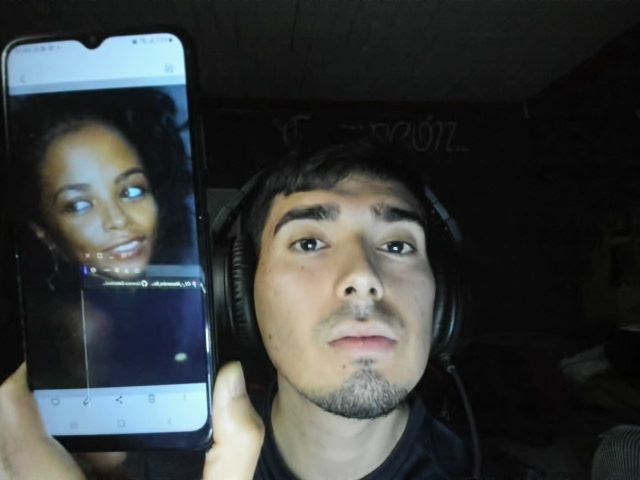

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

####Predicción de la foto tomada

1/1 [==============================] - 0s 38ms/step


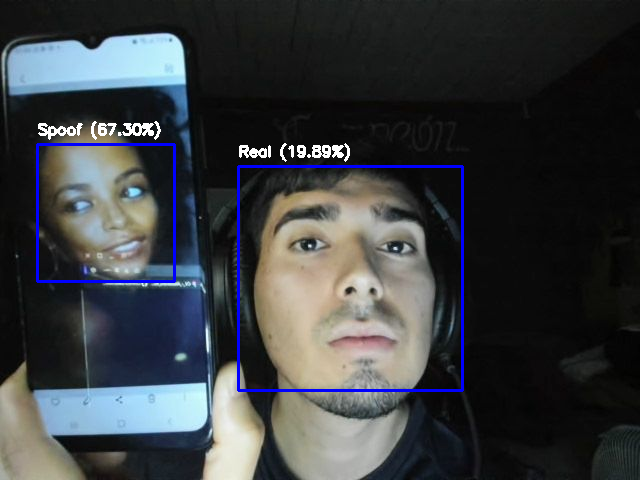

In [ ]:
import cv2
from keras.models import model_from_json
import numpy as np
from google.colab.patches import cv2_imshow

# Función para preprocesar la imagen
def preprocess_image(image):
    image = cv2.resize(image, (160, 160))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Cargar el modelo
json_file = open('/content/antispoofing_model_mobilenetv2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/antispoofing_model_weights.h5")

# Inicializar el clasificador Haar Cascade para la detección de rostros
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

# Cargar la imagen
filename = 'photo.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detectar rostros en la imagen
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    face = img[y:y+h, x:x+w]
    preprocessed_face = preprocess_image(face)

    # Hacer la predicción
    prediction = loaded_model.predict(preprocessed_face)[0]
    prediction_percentage = prediction[0] * 100
    label = "Real" if prediction < 0.5 else "Spoof"
    cv2.putText(img, f'{label} ({prediction_percentage:.2f}%)', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Mostrar la imagen con los bounding boxes
cv2_imshow(img)




####Guardar imagen en algun directorio

In [ ]:
# ... [tu código anterior para procesar la imagen] ...

# Ruta donde quieres guardar la imagen
save_path = '/content/gdrive/MyDrive/Colab Notebooks/Lab 04 y 05/data/Fotos_predichas/processed_photo_mobilenetV2_2.jpg'

# Guardar la imagen procesada en Google Drive
cv2.imwrite(save_path, img)


False

####Predicción en tiempo real

* El umbral queda a criterio del usuario, un porcentaje mayor del umbral aumenta el porcentaje de confianza del modelo.

* La clase positivas es "spoof"

In [ ]:
#start streaming video from webcam
video_stream()

# label for video
label_html = 'Capturing...'

# initializar bounding box a vacío
bbox = ''

count = 0

while True:
    js_reply = video_frame(label_html, bbox)

    if not js_reply:
        break

    # convertir la respuesta JS a una imagen OpenCV
    img = js_to_image(js_reply["img"])

    # crear superposición transparente para la caja delimitadora
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # escala de grises para la detección de rostros
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # obtener coordenadas de la región facial
    faces = face_cascade.detectMultiScale(gray)

    # obtener cuadro delimitador de la cara para la superposición y realizar la predicción
    for (x, y, w, h) in faces:
        # Recortar la región facial y redimensionar al tamaño de entrada del modelo
        face_roi = cv2.resize(img[y:y + h, x:x + w], (160, 160))
        face_roi = np.expand_dims(face_roi, axis=0) / 255.0
        results = model.predict(face_roi)

        # Usar la predicción como etiqueta
        prediction_label = "Live" if results < 0.5 else "Spoofing"

        # Dibujar el cuadro delimitador en la superposición
        bbox_array = cv2.rectangle(bbox_array, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Agregar la etiqueta de predicción con el porcentaje al cuadro delimitador
        label_with_percentage = f"{prediction_label} ({results[0][0]*100:.2f}%)"
        bbox_array = cv2.putText(bbox_array, label_with_percentage, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                                 (255, 255, 255), 1, cv2.LINE_AA)

    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
    # convertir superposición de cuadro delimitador en bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # actualizar bbox para que el próximo fotograma obtenga una nueva superposición
    bbox = bbox_bytes

###Conclusión

Si bien con este método se nota cierta mejoría en los val de loss a comparación del modelo original, esto se basa en un buen ajuste de hiperparametros y arquitectura del modelo, además de beneficiarse del generador de datos y la transferencia de aprendizaje.



###Recomendaciones
* Aumentar el conjunto de datos pero manteniendo la estrategia para combatir el desequilibrio
* Probar con nueva arquitectura y otros hiperparametros, se puede conseguir uno mejor.
* Cambiar el umbral a uno mayor para ver la credibilidad del modelo, esto aplica para las fotos y el live.
* Probar con nuevas fotos que cumplan los requisitos que contienen las etiquetas spoof
* Corroborar si el estandarizado y el rescalado afecta a la calidad de la foto (perdida de información)
* Comprobar con otros tipos de spoofing (Imágenes sintéticas, mascaras, mascarillas, etc)

-----------------------------------------------
## RESNET

Se utiliza este modelo preentrenado por ser categorizado como un buen modelo, ademas de ocupar los pesos de imagenet


###Hiperparametros y compilación del modelo


1)Capas Dropout (0.5).

2)Learning Rate: learning rate del optimizador Adam a 0.0001, Beta_1 = 0.9,
Beta_2 = 0.999 y epsilon= 1e-07.

3)EarlyStopping: EarlyStopping con paciencia = 5 para monitorear la pérdida (val_loss) .

4)Batch Size y Épocas: tamaño del lote (batch_size) a 25 y el número de épocas a 50.

5) Dense: Añade una capa densa con 1024 neuronas y función de activación ReLU.

6) Capa de Salida: Capa densa final con una única neurona y función de activación sigmoide para realizar la clasificación binaria.

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Cargar ResNet50 preentrenado en ImageNet sin la capa superior
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(160, 160, 3))

# Congelar los pesos del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir nuevas capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Ajustar para clasificación binaria

# Definir el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

from keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Compilar el modelo
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(
        learning_rate=0.0001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    ),
    metrics=['accuracy']
)


####Checkpoint pesos

In [ ]:
model_checkpoint2 = ModelCheckpoint('./model_weights/finalyearproject_antispoofing_model_resnet_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

### Entrenamiento y validación

In [ ]:
# Suponiendo que tienes los generadores de datos 'train_generator' y 'valid_generator'
history_resnet = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 25,
    epochs = 50,
    callbacks=[model_checkpoint2,early_stopping])

Epoch 1/50
30/30 [==============================] - ETA: 0s - loss: 0.7348 - accuracy: 0.4952
Epoch 1: val_loss improved from inf to 0.68971, saving model to ./model_weights/finalyearproject_antispoofing_model_resnet_01-0.527273.h5
30/30 [==============================] - 38s 1s/step - loss: 0.7348 - accuracy: 0.4952 - val_loss: 0.6897 - val_accuracy: 0.5273
Epoch 2/50
30/30 [==============================] - ETA: 0s - loss: 0.7458 - accuracy: 0.4787
Epoch 2: val_loss improved from 0.68971 to 0.68814, saving model to ./model_weights/finalyearproject_antispoofing_model_resnet_02-0.658182.h5
30/30 [==============================] - 30s 1s/step - loss: 0.7458 - accuracy: 0.4787 - val_loss: 0.6881 - val_accuracy: 0.6582
Epoch 3/50
30/30 [==============================] - ETA: 0s - loss: 0.7354 - accuracy: 0.4966
Epoch 3: val_loss improved from 0.68814 to 0.68744, saving model to ./model_weights/finalyearproject_antispoofing_model_resnet_03-0.490909.h5
30/30 [==============================]

####Grafico accuracy

* Resultados de entrenamiento: accuracy train: 59% - loss train: 66%
* Resultados de validación: val accuracy: 62% - val loss: 66%
* La precisión tanto en entrenamiento como en validación muestra que es inestable durante todas las épocas.
* No hay una tendencia clara de mejora a lo largo de las épocas, lo que podría indicar problemas con la configuración del entrenamiento, como una tasa de aprendizaje inapropiada, falta de regularización, o problemas con la calidad de los datos.

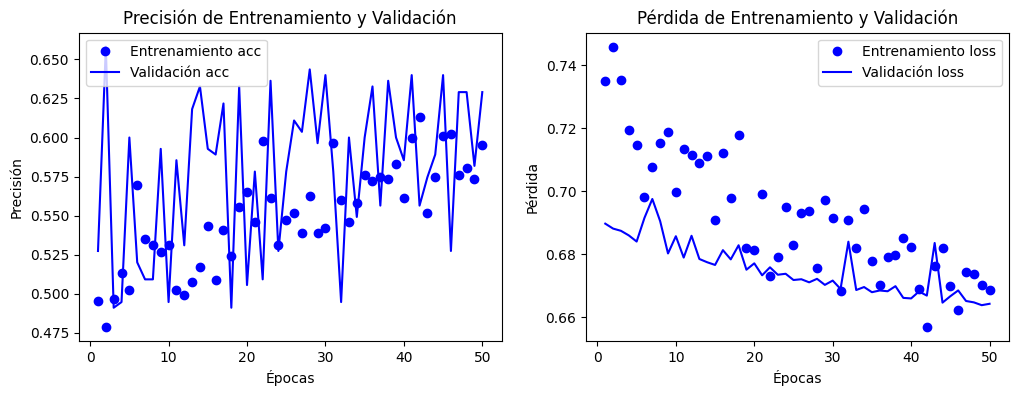

In [ ]:
import matplotlib.pyplot as plt

# Accediendo a los datos de precisión y pérdida
acc = history_resnet.history['accuracy']
val_acc = history_resnet.history['val_accuracy']
loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']
epochs = range(1, len(acc) + 1)

# Gráfico de precisión (accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.plot(epochs, val_acc, 'b', label='Validación acc')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

####Matriz de confusión y metricas
* El modelo muestra un bajo rendimiento con una precisión global y una puntuación F1 ponderada de 62%.
* El modelo es ligeramente mejor identificando imágenes 'real' (105 correctas) que imágenes 'spoof' (68 correctas).
* La precisión es tiene un bajo rendimiento comparado a los otros modelos, 'real' (0.60) y 'spoof' (0.66).
* Existen algunas diferencias en la clasificación, con 35 falsos negativos para 'real' y 69 para 'spoof'.


Found 277 images belonging to 2 classes.
12/12 [==============================] - 9s 716ms/step


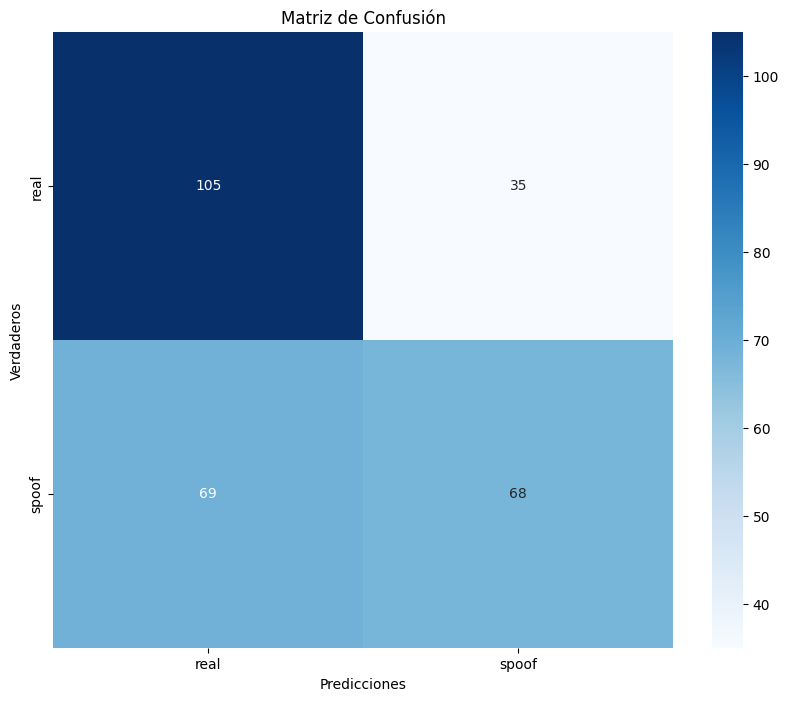

              precision    recall  f1-score   support

        real       0.60      0.75      0.67       140
       spoof       0.66      0.50      0.57       137

    accuracy                           0.62       277
   macro avg       0.63      0.62      0.62       277
weighted avg       0.63      0.62      0.62       277



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

#Supongamos que ya tienes un modelo entrenado 'model' y un generador 'valid_datagen'
#Asegúrate de que el generador de validación no baraja los datos
valid_generator = valid_datagen.flow_from_directory(
    test_dir,  # Asegúrate de reemplazar 'test_dir' con tu directorio de validación
    target_size=(160, 160),
    color_mode='rgb',
    class_mode='binary',
    batch_size=25,
    shuffle=False  # Importante para mantener el orden
)

#Obtener las predicciones del modelo
predictions = model.predict(valid_generator)
#Las predicciones están en términos de probabilidades, las convertimos a etiquetas binarias
predicted_classes = np.where(predictions > 0.5, 1, 0)

#Obtener las etiquetas verdaderas del generador de validación
true_classes = valid_generator.classes

#Generar la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes.flatten())

#Generar el reporte de clasificación
report = classification_report(true_classes, predicted_classes.flatten(), target_names=valid_generator.class_indices.keys())

#Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

#Imprimir el reporte de clasificación
print(report)


###TEST de predicción

In [ ]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [ ]:
check_fakes(test_dir,categories[1])

1/1 [==============================] - 0s 22ms/step


{'spoof': 68, 'real': 69}

In [ ]:
check_fakes(test_dir,categories[0])

1/1 [==============================] - 0s 21ms/step


{'spoof': 35, 'real': 105}

####Guardar modelo y pesos en archivos

Se guarda el modelo en formato JSON y el peso en formato .H5 para su uso posterior.

In [ ]:
# Guardar el modelo en formato JSON
model_json = model.to_json()
with open("/content/antispoofing_model_resnet.json", "w") as json_file:
    json_file.write(model_json)


# Guardar los pesos del modelo en un archivo separado
model.save_weights("/content/antispoofing_model_resnet_weights.h5")

# ... [tu código anterior] ...

# Cargar el modelo
json_file = open('/content/antispoofing_model_resnet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Cargar los pesos en el modelo nuevo
loaded_model.load_weights("/content/antispoofing_model_resnet_weights.h5")

####Inicializar camara
Se utiliza el codigo proporcionado por google colab para inicializar la camara.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


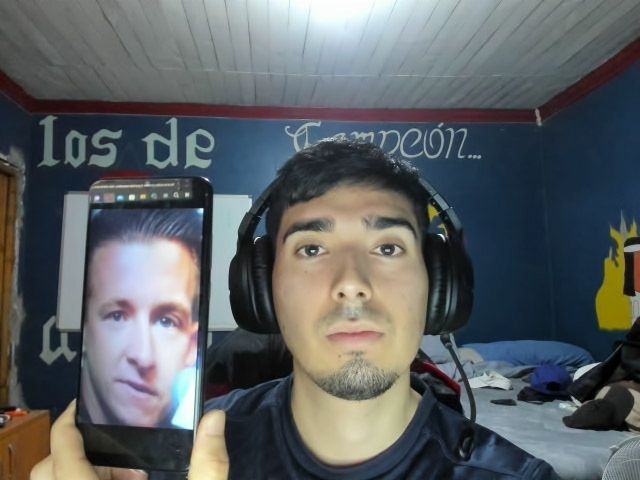

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

####Predicción de la foto tomada

1/1 [==============================] - 0s 31ms/step


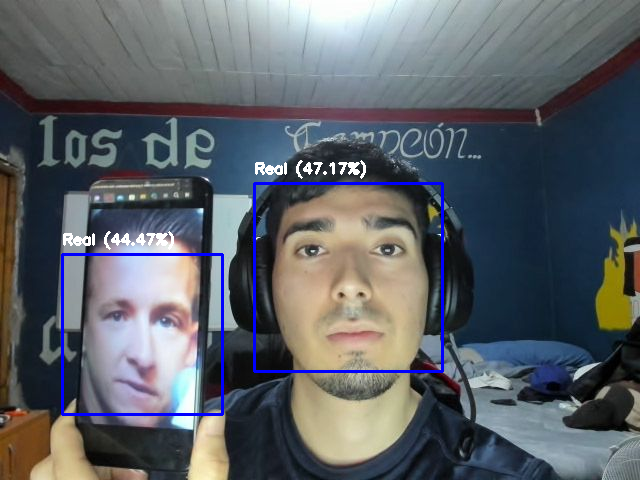

In [ ]:
import cv2
from keras.models import model_from_json
import numpy as np
from google.colab.patches import cv2_imshow

# Función para preprocesar la imagen
def preprocess_image(image):
    image = cv2.resize(image, (160, 160))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Cargar el modelo
json_file = open('/content/antispoofing_model_resnet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/antispoofing_model_resnet_weights.h5")

# Inicializar el clasificador Haar Cascade para la detección de rostros
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

# Cargar la imagen
filename = 'photo.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detectar rostros en la imagen
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    face = img[y:y+h, x:x+w]
    preprocessed_face = preprocess_image(face)

    # Hacer la predicción
    prediction = loaded_model.predict(preprocessed_face)[0]
    prediction_percentage = prediction[0] * 100
    label = "Real" if prediction < 0.5 else "Spoof"
    cv2.putText(img, f'{label} ({prediction_percentage:.2f}%)', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Mostrar la imagen con los bounding boxes
cv2_imshow(img)

####Guardar imagen en el directorio

In [ ]:
# ... [tu código anterior para procesar la imagen] ...

# Ruta donde quieres guardar la imagen
save_path = '/content/gdrive/MyDrive/Colab Notebooks/Lab 04 y 05/data/Fotos_predichas/processed_photo_resnet2.jpg'

# Guardar la imagen procesada en Google Drive
cv2.imwrite(save_path, img)

False

####Predicción en tiempo real

* El umbral queda a criterio del usuario, un porcentaje mayor del umbral aumenta el porcentaje de confianza del modelo.

* La clase positivas es "spoof"

In [ ]:
#start streaming video from webcam
video_stream()

# label for video
label_html = 'Capturing...'

# initializar bounding box a vacío
bbox = ''

count = 0

while True:
    js_reply = video_frame(label_html, bbox)

    if not js_reply:
        break

    # convertir la respuesta JS a una imagen OpenCV
    img = js_to_image(js_reply["img"])

    # crear superposición transparente para la caja delimitadora
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # escala de grises para la detección de rostros
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # obtener coordenadas de la región facial
    faces = face_cascade.detectMultiScale(gray)

    # obtener cuadro delimitador de la cara para la superposición y realizar la predicción
    for (x, y, w, h) in faces:
        # Recortar la región facial y redimensionar al tamaño de entrada del modelo
        face_roi = cv2.resize(img[y:y + h, x:x + w], (160, 160))
        face_roi = np.expand_dims(face_roi, axis=0) / 255.0
        results = model.predict(face_roi)

        # Usar la predicción como etiqueta
        prediction_label = "Live" if results < 0.5 else "Spoofing"

        # Dibujar el cuadro delimitador en la superposición
        bbox_array = cv2.rectangle(bbox_array, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Agregar la etiqueta de predicción con el porcentaje al cuadro delimitador
        label_with_percentage = f"{prediction_label} ({results[0][0]*100:.2f}%)"
        bbox_array = cv2.putText(bbox_array, label_with_percentage, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                                 (255, 255, 255), 1, cv2.LINE_AA)

    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
    # convertir superposición de cuadro delimitador en bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # actualizar bbox para que el próximo fotograma obtenga una nueva superposición
    bbox = bbox_bytes

###Conclusión
Si bien con este método se nota cierta baja en el rendimiento general, aun asi logra entregar resultados aceptables.

Si bien con este método se nota cierta baja en el rendimiento general incluyendo hasta las métricas, entrego resultados aceptables con los cuales se pueden trabajar. No hay una tendencia clara de mejora a lo largo de las épocas, lo que podría indicar problemas con la configuración del entrenamiento, como una tasa de aprendizaje inapropiada, falta de regularización, o problemas con la calidad de los datos.



###Recomendaciones
* Aumentar el conjunto de datos pero manteniendo la estrategia para combatir el desequilibrio
* Probar con nueva arquitectura y otros hiperparametros, se puede conseguir uno mejor.
* Cambiar el umbral a uno mayor para ver la credibilidad del modelo, esto aplica para las fotos y el live.
* Probar con nuevas fotos que cumplan los requisitos que contienen las etiquetas spoof
* Corroborar si el estandarizado y el rescalado afecta a la calidad de la foto (perdida de información)
* Comprobar con otros tipos de spoofing (Imágenes sintéticas, mascaras, mascarillas, etc)

----------------------------------
## DenseNet169

Se eligio este modelo preentrenado debido a los buenos resultados de los laboratorios anteriores respecto a la clasificacion de imagenes, aparte de utilizar los pesos de imagenet.



###Hiperparametros y compilación del modelo




1)Capas Dropout (0.5).

2)Learning Rate: learning rate del optimizador Adam a 0.0001, Beta_1 = 0.9,
Beta_2 = 0.999 y epsilon= 1e-07.

3)EarlyStopping: EarlyStopping con paciencia = 4 para monitorear la pérdida (val_loss) .

4)Batch Size y Épocas: tamaño del lote (batch_size) a 25 y el número de épocas a 50.

5) Dense: Añade una capa densa con 1024 neuronas y función de activación ReLU.

6) Capa de Salida: Capa densa final con una única neurona y función de activación sigmoide para realizar la clasificación binaria.

In [ ]:
from keras.applications.densenet import DenseNet169
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Cargar DenseNet169 preentrenado en ImageNet sin la capa superior
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(160, 160, 3))

# Congelar los pesos del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir nuevas capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Ajustar para clasificación binaria

# Definir el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

from keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min', restore_best_weights=True)

# Compilar el modelo
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(
        learning_rate=0.0001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    ),
    metrics=['accuracy']
)


51877672/51877672 [==============================] - 0s 0us/step


####Checkpoint pesos

In [ ]:
model_checkpoint3 = ModelCheckpoint('./model_weights/finalyearproject_antispoofing_model_Densenet169_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

### Entrenamiento y validación

In [ ]:
# Suponiendo que tienes los generadores de datos 'train_generator' y 'valid_generator'
history_Densenet169 = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 25,
    epochs = 50,
    callbacks=[model_checkpoint3,early_stopping])

Epoch 1/50
30/30 [==============================] - ETA: 0s - loss: 0.5791 - accuracy: 0.7064
Epoch 1: val_loss improved from inf to 0.36005, saving model to ./model_weights/finalyearproject_antispoofing_model_Densenet169_01-0.840000.h5
30/30 [==============================] - 52s 1s/step - loss: 0.5791 - accuracy: 0.7064 - val_loss: 0.3601 - val_accuracy: 0.8400
Epoch 2/50
30/30 [==============================] - ETA: 0s - loss: 0.4082 - accuracy: 0.8080
Epoch 2: val_loss improved from 0.36005 to 0.27246, saving model to ./model_weights/finalyearproject_antispoofing_model_Densenet169_02-0.876364.h5
30/30 [==============================] - 33s 1s/step - loss: 0.4082 - accuracy: 0.8080 - val_loss: 0.2725 - val_accuracy: 0.8764
Epoch 3/50
30/30 [==============================] - ETA: 0s - loss: 0.3345 - accuracy: 0.8628
Epoch 3: val_loss improved from 0.27246 to 0.26015, saving model to ./model_weights/finalyearproject_antispoofing_model_Densenet169_03-0.883636.h5
30/30 [================

####Grafico accuracy

* Resultados de entrenamiento: accuracy train: 94% - loss train: 16%
* Resultados de validación: val accuracy: 92% - val loss: 16%
* La precisión tanto en entrenamiento como en validación muestra una estabilización después de las primeras épocas.
* En el monitoreo de la tendencia se observa un punto de sobreajuste si el entrenamiento se extendiera más allá del límite actual.

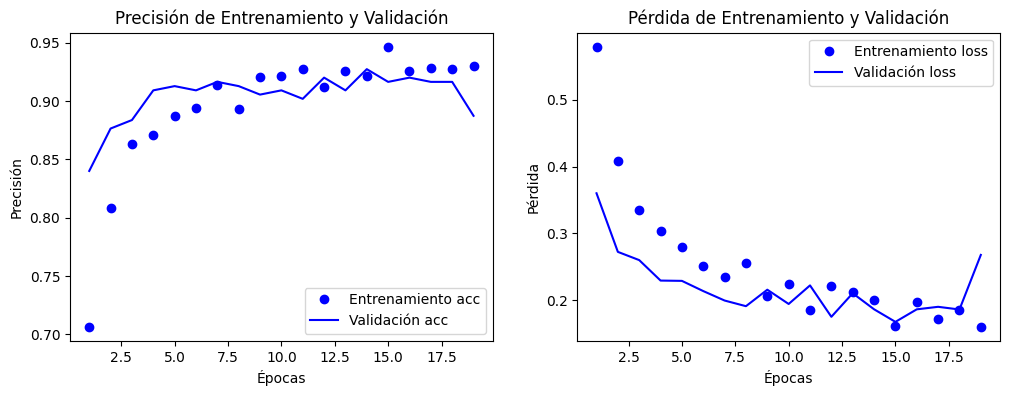

In [ ]:
import matplotlib.pyplot as plt

# Accediendo a los datos de precisión y pérdida
acc = history_Densenet169.history['accuracy']
val_acc = history_Densenet169.history['val_accuracy']
loss = history_Densenet169.history['loss']
val_loss = history_Densenet169.history['val_loss']
epochs = range(1, len(acc) + 1)

# Gráfico de precisión (accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.plot(epochs, val_acc, 'b', label='Validación acc')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

####Matriz de confusión y metricas

* El modelo muestra un alto rendimiento con una precisión global y una puntuación F1 ponderada de 0.92.
* El modelo es ligeramente mejor identificando imágenes 'reales' (137 correctas) que imágenes 'spoof' (117 correctas).
* La precisión es bastante equilibrada entre las clases 'real' (0.87) y 'spoof' (0.97).
* Existen algunas diferencias menores en la clasificación, con 3 falsos negativos para 'real' y 20 para 'spoof'.

Found 277 images belonging to 2 classes.
12/12 [==============================] - 11s 683ms/step


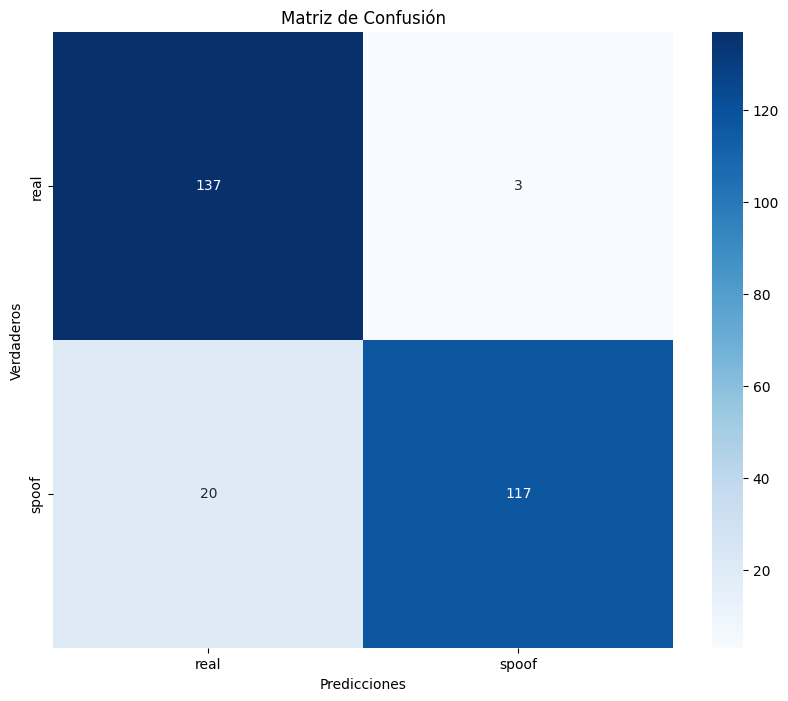

              precision    recall  f1-score   support

        real       0.87      0.98      0.92       140
       spoof       0.97      0.85      0.91       137

    accuracy                           0.92       277
   macro avg       0.92      0.92      0.92       277
weighted avg       0.92      0.92      0.92       277



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

#Supongamos que ya tienes un modelo entrenado 'model' y un generador 'valid_datagen'
#Asegúrate de que el generador de validación no baraja los datos
valid_generator = valid_datagen.flow_from_directory(
    test_dir,  # Asegúrate de reemplazar 'test_dir' con tu directorio de validación
    target_size=(160, 160),
    color_mode='rgb',
    class_mode='binary',
    batch_size=25,
    shuffle=False  # Importante para mantener el orden
)

#Obtener las predicciones del modelo
predictions = model.predict(valid_generator)
#Las predicciones están en términos de probabilidades, las convertimos a etiquetas binarias
predicted_classes = np.where(predictions > 0.5, 1, 0)

#Obtener las etiquetas verdaderas del generador de validación
true_classes = valid_generator.classes

#Generar la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes.flatten())

#Generar el reporte de clasificación
report = classification_report(true_classes, predicted_classes.flatten(), target_names=valid_generator.class_indices.keys())

#Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

#Imprimir el reporte de clasificación
print(report)

###Test de predicción

In [ ]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [ ]:
check_fakes(test_dir,categories[1])

1/1 [==============================] - 0s 50ms/step


{'spoof': 117, 'real': 20}

In [ ]:
check_fakes(test_dir,categories[0])

1/1 [==============================] - 0s 56ms/step


{'real': 137, 'spoof': 3}

####Guardar modelo y pesos en archivos.

Se guarda el modelo en formato JSON y el peso en formato .H5 para su uso posterior.

In [ ]:
# Guardar el modelo en formato JSON
model_json = model.to_json()
with open("/content/antispoofing_model_densenet169.json", "w") as json_file:
    json_file.write(model_json)


# Guardar los pesos del modelo en un archivo separado
model.save_weights("/content/antispoofing_model_densenet169_weights.h5")

# ... [tu código anterior] ...

# Cargar el modelo
json_file = open('/content/antispoofing_model_densenet169.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Cargar los pesos en el modelo nuevo
loaded_model.load_weights("/content/antispoofing_model_densenet169_weights.h5")

####Inicializar camara

Se utiliza el codigo proporcionado por google colab para inicializar la camara.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


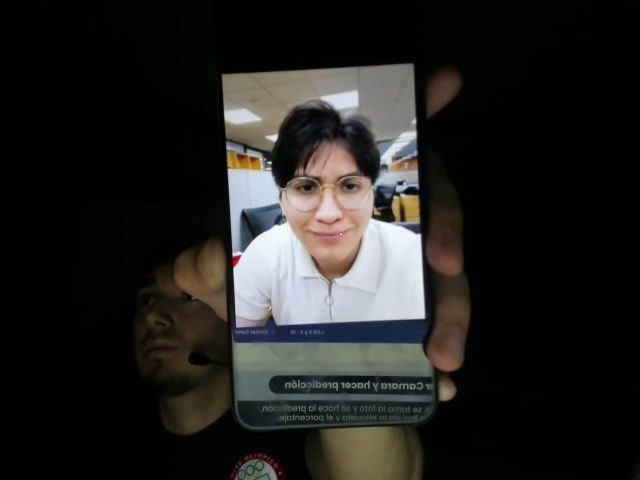

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

####Predicción de la foto tomada

1/1 [==============================] - 3s 3s/step


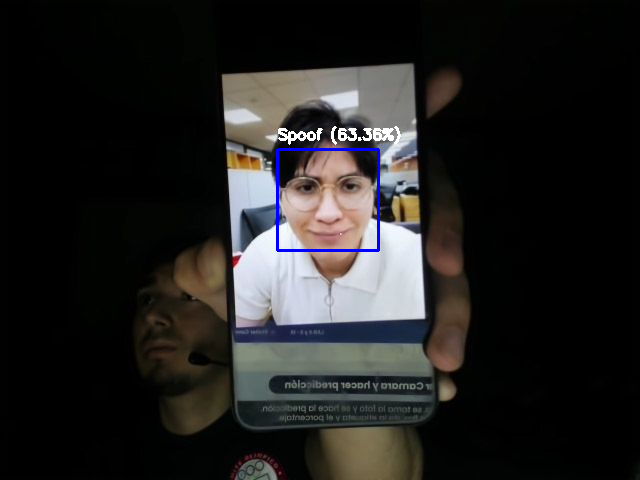

In [ ]:
import cv2
from keras.models import model_from_json
import numpy as np
from google.colab.patches import cv2_imshow

# Función para preprocesar la imagen
def preprocess_image(image):
    image = cv2.resize(image, (160, 160))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Cargar el modelo
json_file = open('/content/antispoofing_model_densenet169.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/antispoofing_model_densenet169_weights.h5")

# Inicializar el clasificador Haar Cascade para la detección de rostros
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

# Cargar la imagen
filename = 'photo.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detectar rostros en la imagen
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    face = img[y:y+h, x:x+w]
    preprocessed_face = preprocess_image(face)

    # Hacer la predicción
    prediction = loaded_model.predict(preprocessed_face)[0]
    prediction_percentage = prediction[0] * 100
    label = "Real" if prediction < 0.5 else "Spoof"
    cv2.putText(img, f'{label} ({prediction_percentage:.2f}%)', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Mostrar la imagen con los bounding boxes
cv2_imshow(img)

####Guardar imagen en algun directorio.

In [ ]:
# ... [tu código anterior para procesar la imagen] ...

# Ruta donde quieres guardar la imagen
save_path = '/content/gdrive/MyDrive/Colab Notebooks/Lab 04 y 05/data/Fotos_predichas/processed_photo_densenet169.2.jpg'

# Guardar la imagen procesada en Google Drive
cv2.imwrite(save_path, img)

False

####Predicción en tiempo real

* El umbral queda a criterio del usuario, un porcentaje mayor del umbral aumenta el porcentaje de confianza del modelo.

* La clase positivas es "spoof"

In [ ]:
#start streaming video from webcam
video_stream()

# label for video
label_html = 'Capturing...'

# initializar bounding box a vacío
bbox = ''

count = 0

while True:
    js_reply = video_frame(label_html, bbox)

    if not js_reply:
        break

    # convertir la respuesta JS a una imagen OpenCV
    img = js_to_image(js_reply["img"])

    # crear superposición transparente para la caja delimitadora
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # escala de grises para la detección de rostros
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # obtener coordenadas de la región facial
    faces = face_cascade.detectMultiScale(gray)

    # obtener cuadro delimitador de la cara para la superposición y realizar la predicción
    for (x, y, w, h) in faces:
        # Recortar la región facial y redimensionar al tamaño de entrada del modelo
        face_roi = cv2.resize(img[y:y + h, x:x + w], (160, 160))
        face_roi = np.expand_dims(face_roi, axis=0) / 255.0
        results = model.predict(face_roi)

        # Usar la predicción como etiqueta
        prediction_label = "Live" if results < 0.5 else "Spoofing"

        # Dibujar el cuadro delimitador en la superposición
        bbox_array = cv2.rectangle(bbox_array, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Agregar la etiqueta de predicción con el porcentaje al cuadro delimitador
        label_with_percentage = f"{prediction_label} ({results[0][0]*100:.2f}%)"
        bbox_array = cv2.putText(bbox_array, label_with_percentage, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                                 (255, 255, 255), 1, cv2.LINE_AA)

    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
    # convertir superposición de cuadro delimitador en bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # actualizar bbox para que el próximo fotograma obtenga una nueva superposición
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 33ms/step


KeyboardInterrupt: ignored

###Conclusión
Si bien con este método se nota cierta mejoría en los val de loss a comparación del modelo de Resnet50, esto se basa en un buen ajuste de hiperparametros y arquitectura del modelo, además de beneficiarse del generador de datos y la transferencia de aprendizaje.
Hay 20 imágenes 'spoof' clasificadas incorrectamente como 'real', indicando que el modelo puede mejorar en la identificación de 'spoof'.



###Recomendaciones
* Aumentar el conjunto de datos pero manteniendo la estrategia para combatir el desequilibrio
* Probar con nueva arquitectura y otros hiperparametros, se puede conseguir uno mejor.
* Cambiar el umbral a uno mayor para ver la credibilidad del modelo, esto aplica para las fotos y el live.
* Probar con nuevas fotos que cumplan los requisitos que contienen las etiquetas spoof.
* Corroborar si el estandarizado y el rescalado afecta a la calidad de la foto (perdida de información)
* Comprobar con otros tipos de spoofing (Imágenes sintéticas, mascaras, mascarillas, etc)

# Conclusiones y recomendaciones finales


* Durante este colab se pudo observar diferentes tipos de modelos los cuales tenian diferentes rendimientos y esto se basaba netamente en como esta compuesta la arquitectura y los ajuste de hiperparametros, ademas de beneficiarse algunos de la tecnica de transferencia de aprendizaje los cuales estos obtuvieron los mejores resultados.

* Tener una estrategia planeada desde el principio y analizar bien los datos con los que se estan trabajando beneficia positivamente al desarrollo del proyecto.

* Este proyecto solo abarca 3 tipos de spoofing pero en realidad hay muchos mas, el codigo esta diseñado para seguir abarcando mas tipos por lo cual se recomienda implementar mas tipos de spoofing para ver como se comportan los modelos, siempre siguiendo la estrategia para combatir el desquilibrio. Uno de los tipos de spoofing mas dificil que se puede tener seria el de las imagenes sinteticas debido al parecido que se tiene con las imagenes reales.

* Como recomendaciones se espera que se siga indagando en nuevas arquitecturas y cambios de hiperparametros, ademas de probar con diferentes umbrales para ver la confianza que se obtiene del modelo.

* Se recomienda utilizar una camara de buena calidad para que este no sea un impedimiendo para ver la confianza del modelo.

